In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
df = pd.read_csv('minimal_merlin_data.csv') 

C:\Users\User\AppData\Local\Temp\ipykernel_20072\3751139265.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('minimal_merlin_data.csv')


In [3]:
df = df.replace({True: 1, False: 0})

C:\Users\User\AppData\Local\Temp\ipykernel_20072\3074727906.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


In [4]:
# Filter the DataFrame to include only neuraxial catheter (ie, epidural + CSE + intrathecal) or epidural-only catheter procedures
neuraxial_catheter_df = df[df['is_neuraxial_catheter'] == 1]
epidural_df = df[(df['true_procedure_type'] == 'epidural')]

# Describe Dataframe

There are 158364 total rows, of which 22218 have NaN true_procedure_type.

Every row receives a value for all Boolean variables: thus if no value is present, they become False. Furthermore, NaN procedures become False is_neuraxial_catheter and failed_catheter.

is_neuraxial_catheter includes epidurals + CSEs + intrathecals

failed_catheter is applied to BOTH neuraxial_catheters (which may be coded True or False for failure) and also to all procedures that are not neuraxial_catheters (will always be coded False).

In [5]:
df.shape

(158364, 35)

In [6]:
def describe_dataframe(df):
    """
    For each column in df:
      - If dtype is object or int64 or bool, list each unique value and its counts.
      - If dtype is float64, display min, Q1, median, Q3, and max.
      - Otherwise, handle accordingly (datetime, etc.).
    """
    for col in df.columns:
        col_type = df[col].dtype

        print(f"Column: {col}")
        print(f"  Data Type: {col_type}")

        if col_type == 'object' or col_type == 'int64' or col_type == 'bool':
            # Show unique values and their counts
            value_counts = df[col].value_counts(dropna=False)
            print("  Value counts:")
            for val, count in value_counts.items():
                print(f"    {val}: {count}")

        elif col_type == 'float64':
            # Show min, Q1 (25%), median (50%), Q3 (75%), and max
            desc = df[col].describe(percentiles=[0.25, 0.5, 0.75])
            na_count = df[col].isna().sum()
            print("  Summary stats:")
            print(f"    NaN:    {na_count}")
            print(f"    Min:    {desc['min']}")
            print(f"    Q1:     {desc['25%']}")
            print(f"    Median: {desc['50%']}")
            print(f"    Q3:     {desc['75%']}")
            print(f"    Max:    {desc['max']}")

        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            # Example handling for datetime columns
            print("  (Datetime column – no numeric summary or value counts shown.)")

        else:
            # Handle any other data types as needed
            print("  (No specific handling implemented for this data type.)")

        print("-" * 50)

describe_dataframe(df)


Column: gestational_age_2052
  Data Type: float64
  Summary stats:
    NaN:    2339
    Min:    87.0
    Q1:     267.0
    Median: 275.0
    Q3:     281.0
    Max:    308.0
--------------------------------------------------
Column: delivery_site_2188
  Data Type: object
  Value counts:
    bwh: 64334
    mgh: 35716
    nwh: 35053
    slm: 9973
    wdh: 7380
    cdh: 3901
    nch: 1002
    mvh: 982
    mgb: 14
    nsc: 9
--------------------------------------------------
Column: baby_weight_2196
  Data Type: float64
  Summary stats:
    NaN:    3251
    Min:    0.0
    Q1:     2.9766996
    Median: 3.3299346192
    Q3:     3.6551036136
    Max:    7.1698771032
--------------------------------------------------
Column: rom_thru_delivery_hours
  Data Type: float64
  Summary stats:
    NaN:    20054
    Min:    0.0
    Q1:     1.45
    Median: 5.45
    Q3:     12.066666666666666
    Max:    711.8166666666667
--------------------------------------------------
Column: fetal_presentation_cate

In [7]:
def describe_as_tables(df):
    # Separate columns by dtype
    categorical_cols = []
    numeric_cols = []

    for col in df.columns:
        if df[col].dtype == 'object' or df[col].dtype == 'int64' or df[col].dtype == 'bool':
            categorical_cols.append(col)
        elif df[col].dtype == 'float64':
            numeric_cols.append(col)
        else:
            # skip or handle datetime, etc. if desired
            pass

    # --- Build table for categorical variables ---
    cat_data = {}
    for col in categorical_cols:
        # Get value counts (including NaN as a separate category)
        vc = df[col].value_counts(dropna=False)
        # Convert value counts to a dict, or a formatted string
        vc_str = ", ".join(f"{val}: {count}" for val, count in vc.items())
        cat_data[col] = {
            'value_counts': vc_str
        }
    cat_df = pd.DataFrame(cat_data).T  # Transpose so rows = columns, col = 'value_counts'

    # --- Build table for numeric variables ---
    num_data = {}
    for col in numeric_cols:
        desc = df[col].describe(percentiles=[0.25, 0.5, 0.75])
        na_count = df[col].isna().sum()
        num_data[col] = {
            'count': desc['count'],
            'count_nan': na_count,
            'min': desc['min'],
            'Q1': desc['25%'],
            'median': desc['50%'],
            'Q3': desc['75%'],
            'max': desc['max']
        }
    num_df = pd.DataFrame(num_data).T  # Transpose so rows = columns

    return cat_df, num_df

cat_table, num_table = describe_as_tables(df)


In [8]:
cat_table

,value_counts
delivery_site_2188,"bwh: 64334, mgh: 35716, nwh: 35053, slm: 9973,..."
fetal_presentation_category_2243,"cephalic: 134205, nan: 12656, breech: 7827, co..."
fetal_presentation_subcategory_2244,"vertex: 134037, nan: 20328, compound: 2990, tr..."
fetal_presentation_position_2247,"nan: 80824, anterior: 67514, posterior: 7255, ..."
true_procedure_type,"epidural: 93221, spinal: 25186, nan: 22402, cs..."
is_neuraxial_catheter,"1: 107523, 0: 50841"
failed_catheter,"0: 152023, 1: 6341"
dpe,"0: 142193, 1: 16171"
highly_experienced_anesthesiologist,"no: 63149, yes: 47811, none: 47404"
highly_experienced_resident,"none: 81897, no: 47821, yes: 28646"


In [9]:
num_table

,count,count_nan,min,Q1,median,Q3,max
gestational_age_2052,156025.0,2339.0,87.000000,267.00000,275.000000,281.000000,308.000000
baby_weight_2196,155113.0,3251.0,0.000000,2.97670,3.329935,3.655104,7.169877
rom_thru_delivery_hours,138310.0,20054.0,0.000000,1.45000,5.450000,12.066667,711.816667
bmi_end_pregnancy_2044,150134.0,8230.0,5.800000,27.00000,30.100000,34.200000,69.900000
maternal_weight_end_pregnancy_2045,152039.0,6325.0,0.089018,70.76041,79.786898,91.126707,218.997798
bmi_before_pregnancy_2161,109588.0,48776.0,6.660000,22.10000,25.000000,29.300000,67.700000
gravidity_2047,107712.0,50652.0,0.000000,1.00000,2.000000,3.000000,18.000000
parity_2048,94664.0,63700.0,0.000000,0.00000,1.000000,1.000000,12.000000
lor_depth,105277.0,53087.0,0.000000,4.80000,5.000000,6.000000,18.000000
current_resident_catheter_count,76467.0,81897.0,0.000000,15.00000,36.000000,67.000000,332.000000


# Data Visualization

## Procedure Types

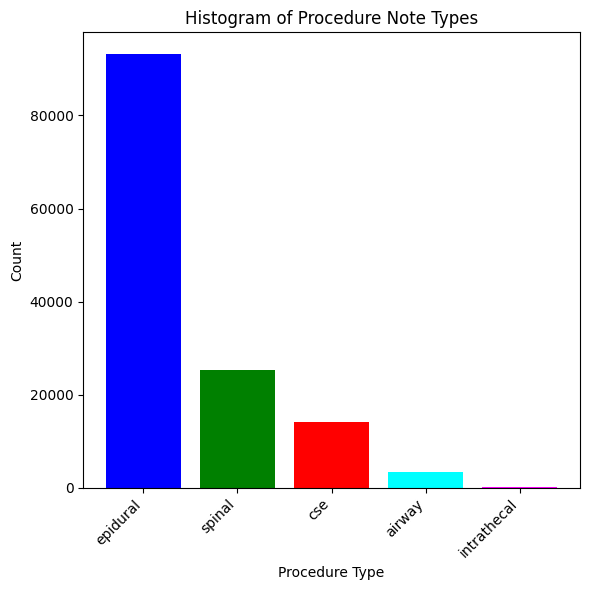

In [10]:
# prompt: make a histogram of procedure note types using different colors

# Assuming 'procedure_type' column exists in your DataFrame 'df'
procedure_type_counts = df['true_procedure_type'].value_counts()

plt.figure(figsize=(6, 6))
plt.bar(procedure_type_counts.index, procedure_type_counts.values, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange'])
plt.xlabel('Procedure Type')
plt.ylabel('Count')
plt.title('Histogram of Procedure Note Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


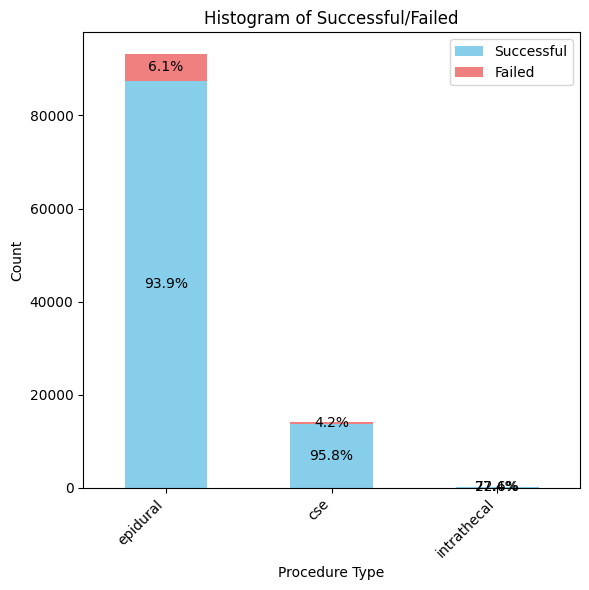

In [11]:
# Histogram of successes/failures

# Group by procedure type and whether it has subsequent anesthesia
procedure_counts = pd.crosstab(neuraxial_catheter_df['true_procedure_type'], neuraxial_catheter_df['failed_catheter'])

# Sort the bars in descending order based on the total count of each procedure type
procedure_counts = procedure_counts.sort_values(by=0, ascending=False)

# Create a stacked bar chart
ax = procedure_counts.plot(kind='bar', stacked=True, figsize=(6
, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Procedure Type')
plt.ylabel('Count')
plt.title('Histogram of Successful/Failed')
plt.xticks(rotation=45, ha='right')
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()


In [12]:
# Display the table with the same information
print("Table of Neuraxial Catheter Procedures by Success/Failure:")
print(procedure_counts)


Table of Neuraxial Catheter Procedures by Success/Failure:
failed_catheter          0     1
true_procedure_type             
epidural             87500  5721
cse                  13579   590
intrathecal            103    30


## Anesthesiologist Experience

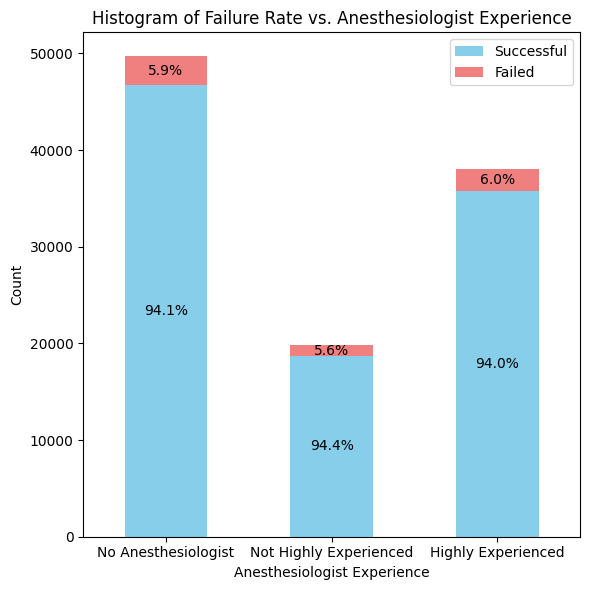

Table of Failure Rate vs. Anesthesiologist Experience:


failed_catheter,0,1
highly_experienced_anesthesiologist,,
no,46742,2946
none,18669,1115
yes,35771,2280


In [13]:
# prompt: Create a similar histogram for failure rate vs highly experienced anesthesiologist

# Group by 'highly_experienced_anesthesiologist' and 'failed_catheter'
experience_failure_counts = pd.crosstab(neuraxial_catheter_df['highly_experienced_anesthesiologist'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = experience_failure_counts.plot(kind='bar', stacked=True, figsize=(6, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Anesthesiologist Experience')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Anesthesiologist Experience')
plt.xticks(rotation=0, ha='center', ticks=[0,1,2], labels=['No Anesthesiologist','Not Highly Experienced', 'Highly Experienced'])
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Anesthesiologist Experience:")
experience_failure_counts

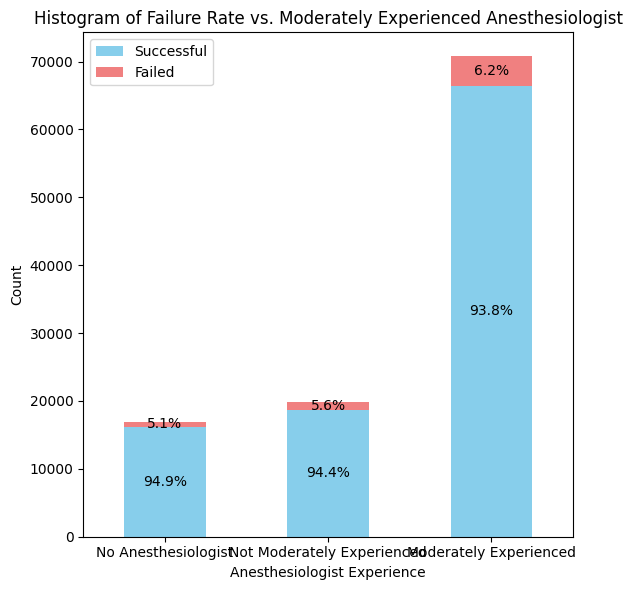

Table of Failure Rate vs. Moderately Experienced Anesthesiologist:


failed_catheter,0,1
moderately_experienced_anesthesiologist,,
no,16103,869
none,18669,1115
yes,66410,4357


In [14]:
# prompt: create a similar histogram for failure rate vs moderately experienced anesthesiologist

# Group by 'moderately_experienced_anesthesiologist' and 'failed_catheter'
experience_failure_counts = pd.crosstab(neuraxial_catheter_df['moderately_experienced_anesthesiologist'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = experience_failure_counts.plot(kind='bar', stacked=True, figsize=(6, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Anesthesiologist Experience')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Moderately Experienced Anesthesiologist')
plt.xticks(rotation=0, ha='center', ticks=[0,1,2], labels=['No Anesthesiologist','Not Moderately Experienced', 'Moderately Experienced'])
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Moderately Experienced Anesthesiologist:")
experience_failure_counts

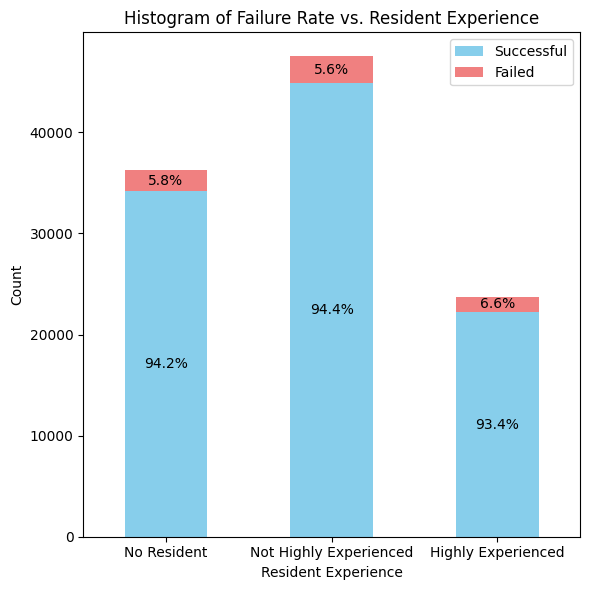

Table of Failure Rate vs. Resident Experience:


failed_catheter,0,1
highly_experienced_resident,,
no,34164,2097
none,44832,2678
yes,22186,1566


In [15]:
# prompt: Create a similar histogram for failure rate vs highly experienced resident

# Group by 'highly_experienced_resident' and 'failed_catheter'
experience_failure_counts = pd.crosstab(neuraxial_catheter_df['highly_experienced_resident'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = experience_failure_counts.plot(kind='bar', stacked=True, figsize=(6, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Resident Experience')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Resident Experience')
plt.xticks(rotation=0, ha='center', ticks=[0,1,2], labels=['No Resident','Not Highly Experienced', 'Highly Experienced'])
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Resident Experience:")
experience_failure_counts

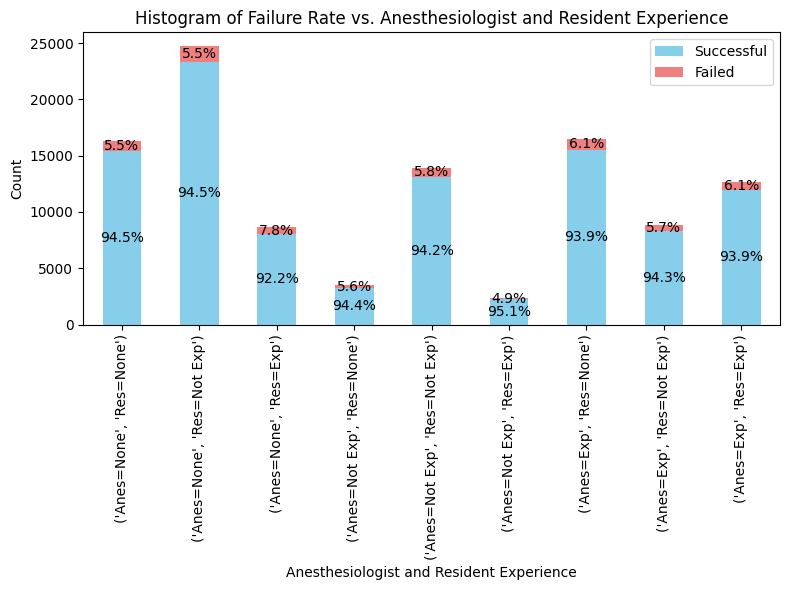

Table of Failure Rate vs. Anesthesiologist and Resident Experience:


failed_catheter                                                      0     1
highly_experienced_anesthesiologist highly_experienced_resident             
no                                  no                           15381   897
                                    none                         23350  1367
                                    yes                           8011   682
none                                no                            3281   195
                                    none                         13132   804
                                    yes                           2256   116
yes                                 no                           15502  1005
                                    none                          8350   507
                                    yes                          11919   768

In [16]:
# prompt: Create a similar histogram but look at all combinations of resident and anesthesiologist experience. Make the x-axis labels vertical.

# Group by 'highly_experienced_anesthesiologist', 'highly_experienced_resident', and 'failed_catheter'
experience_failure_counts = pd.crosstab([neuraxial_catheter_df['highly_experienced_anesthesiologist'], neuraxial_catheter_df['highly_experienced_resident']], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = experience_failure_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Anesthesiologist and Resident Experience')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Anesthesiologist and Resident Experience')


# Customize x-axis labels
import itertools
anesth_levels = ["Anes=None", "Anes=Not Exp", "Anes=Exp"]
resident_levels = ["Res=None", "Res=Not Exp", "Res=Exp"]
labels = list(itertools.product(anesth_levels, resident_levels))
plt.xticks(rotation=90, ha='center', ticks=range(len(labels)), labels=labels)

plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Anesthesiologist and Resident Experience:")
experience_failure_counts

Crosstab of Resident Experience by BMI:
highly_experienced_resident  no  none  yes
bmi_end_pregnancy_2044                    
5.80                          0     0    1
9.10                          0     1    0
9.40                          0     0    1
9.60                          0     1    0
9.85                          0     1    0
...                          ..   ...  ...
68.20                         1     1    0
68.30                         0     0    1
68.50                         0     1    0
69.80                         1     0    2
69.90                         0     0    1

[2652 rows x 3 columns]


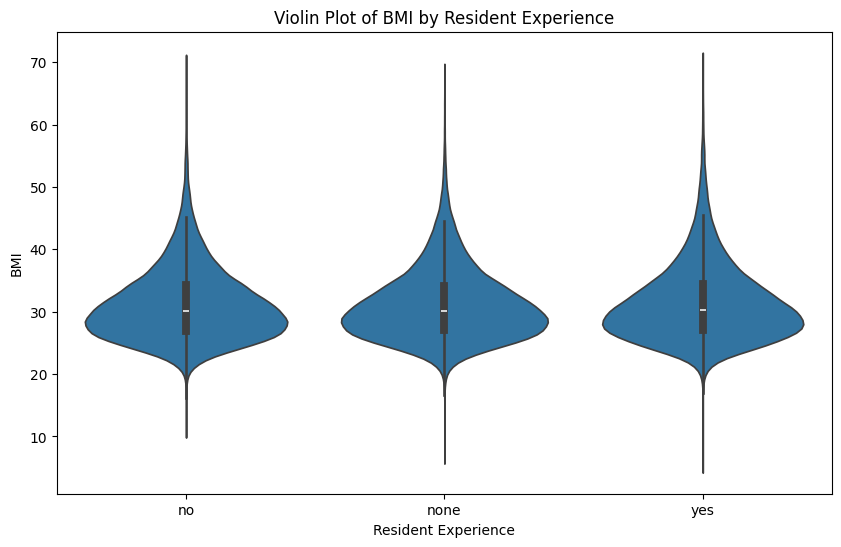

In [17]:
# prompt: crosstab resident experience by BMI and make violin plots

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame (as defined in the provided code)
# and it contains columns 'bmi_end_pregnancy_2044' and 'resident_experience' (or a similar column)

# Create the cross-tabulation
crosstab_data = pd.crosstab(neuraxial_catheter_df['bmi_end_pregnancy_2044'], neuraxial_catheter_df['highly_experienced_resident'])

# Display the cross-tabulation
print("Crosstab of Resident Experience by BMI:")
print(crosstab_data)

# Create violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='highly_experienced_resident', y='bmi_end_pregnancy_2044', data=df)
plt.xlabel('Resident Experience')  # Customize the x-axis label
plt.ylabel('BMI') # Customize the y-axis label
plt.title('Violin Plot of BMI by Resident Experience')
plt.show()

## Delivery Site

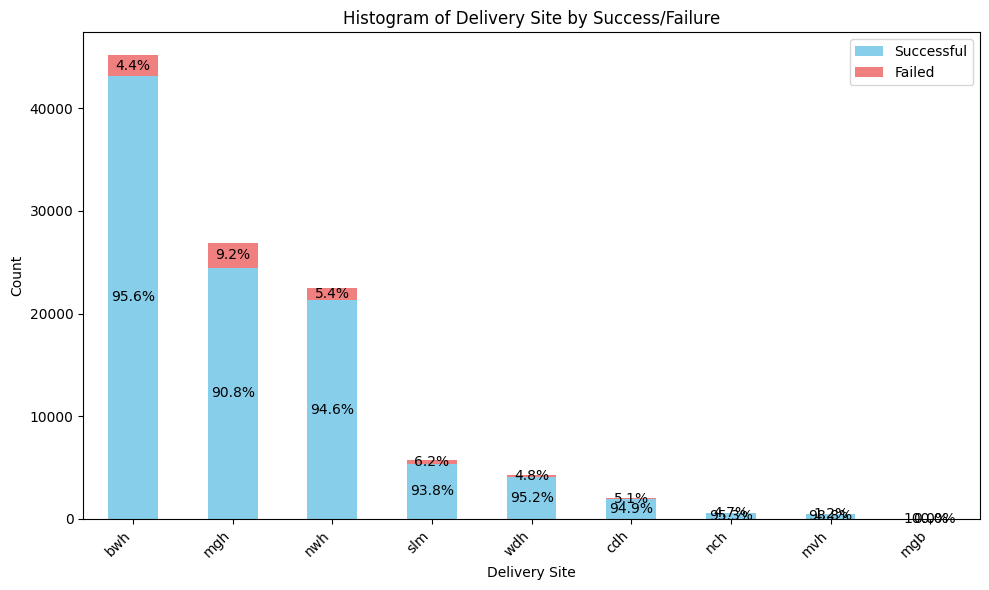

Table of Delivery Site by Success/Failure:


failed_catheter,0,1
delivery_site_2188,,
bwh,43174,1971
mgh,24435,2462
nwh,21277,1216
slm,5329,355
wdh,4064,203
cdh,1877,101
nch,544,27
mvh,481,6
mgb,1,0


In [18]:
# prompt: create a similar histogram of delivery_site_2188 using crosstab

# Create a crosstab for 'delivery_site_2188' and visualize it as a histogram
delivery_site_counts = pd.crosstab(neuraxial_catheter_df['delivery_site_2188'], neuraxial_catheter_df['failed_catheter'])

# Sort the bars in descending order based on the total count of each delivery site
delivery_site_counts = delivery_site_counts.sort_values(by=0, ascending=False)

# Create a stacked bar chart
ax = delivery_site_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Delivery Site')
plt.ylabel('Count')
plt.title('Histogram of Delivery Site by Success/Failure')
plt.xticks(rotation=45, ha='right')
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Delivery Site by Success/Failure:")
delivery_site_counts

## DPE

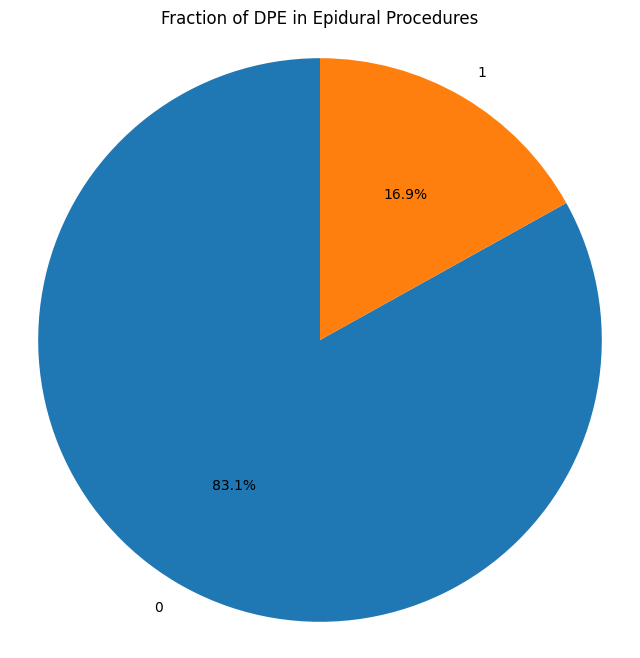

In [19]:
# prompt: # prompt: create a pie chart of the fraction of DPE in epidural_df

# Count DPE values, treating NaN and '' as "no"
dpe_counts = epidural_df['dpe'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(dpe_counts, labels=dpe_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Fraction of DPE in Epidural Procedures')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

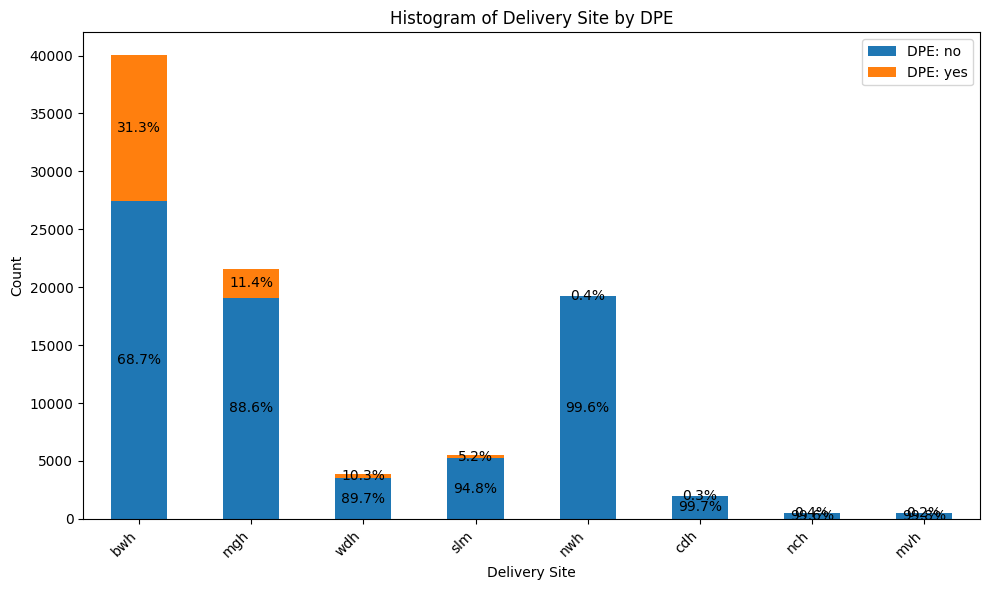

Table of Delivery Site by DPE:


dpe,0,1
delivery_site_2188,,
bwh,27475,12532
mgh,19110,2464
wdh,3490,399
slm,5233,287
nwh,19200,81
cdh,1968,6
nch,488,2
mvh,485,1


In [20]:
# prompt: reproduce the above histogram using crosstab on delivery_site_2188 and dpe

# Assuming 'df' is your DataFrame (as defined in the provided code)

# Create a crosstab for 'delivery_site_2188' and 'dpe' and visualize it as a histogram
delivery_site_dpe_counts = pd.crosstab(epidural_df['delivery_site_2188'], epidural_df['dpe'])

# Sort the bars in descending order based on the total count of each delivery site
delivery_site_dpe_counts = delivery_site_dpe_counts.sort_values(by=1, ascending=False) # Sort by 'no'

# Create a stacked bar chart
ax = delivery_site_dpe_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Delivery Site')
plt.ylabel('Count')
plt.title('Histogram of Delivery Site by DPE')
plt.xticks(rotation=45, ha='right')
plt.legend(['DPE: no', 'DPE: yes']) # Update legend labels
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Delivery Site by DPE:")
delivery_site_dpe_counts

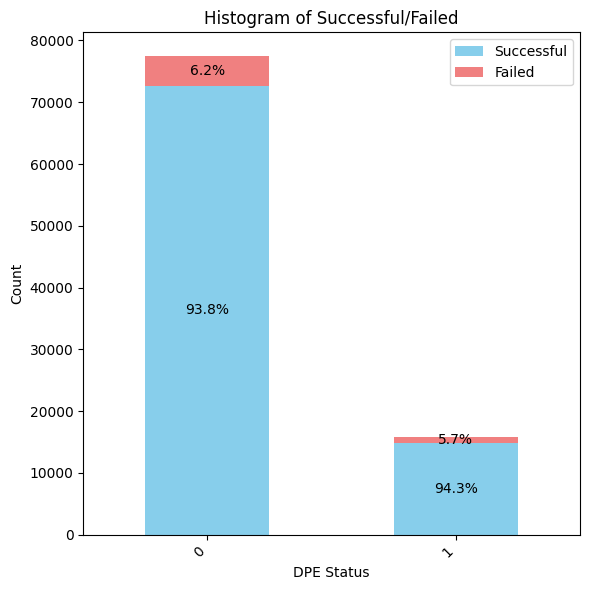

In [21]:
# Histogram of successes/failures by DPE status

# Group by procedure type and whether it has subsequent anesthesia
dpe_crosstab = pd.crosstab(epidural_df['dpe'], epidural_df['failed_catheter'])

# Create a stacked bar chart
ax = dpe_crosstab.plot(kind='bar', stacked=True, figsize=(6
, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
  width = p.get_width()
  height = p.get_height()
  x, y = p.get_xy()
  ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('DPE Status')
plt.ylabel('Count')
plt.title('Histogram of Successful/Failed')
plt.xticks(rotation=45, ha='right')
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()


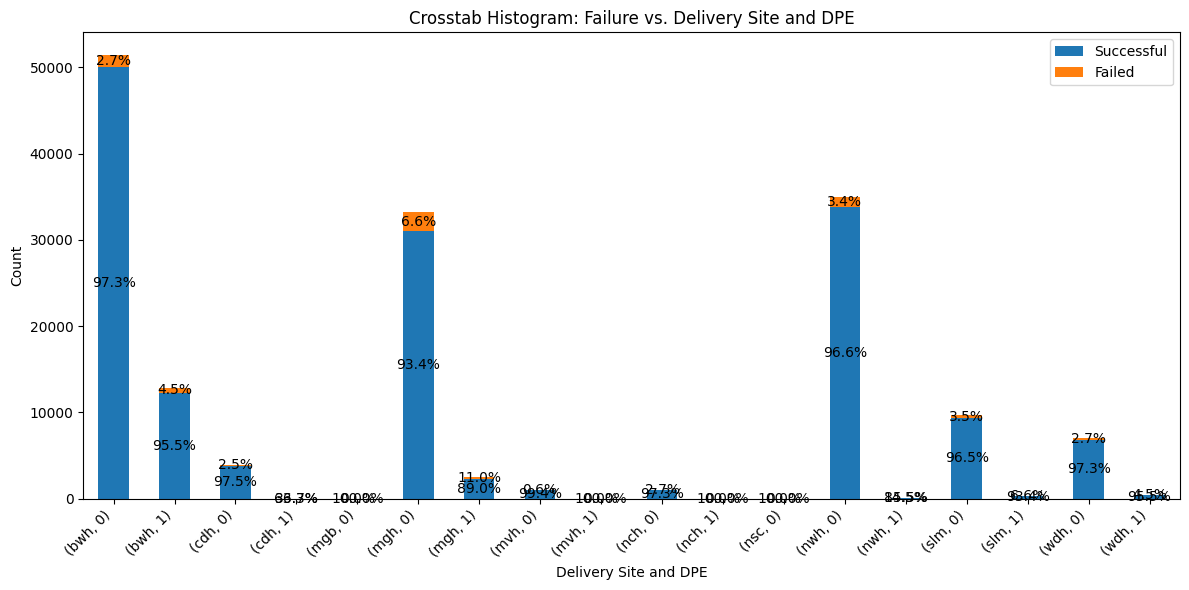

Crosstab Table:


failed_catheter             0     1
delivery_site_2188 dpe             
bwh                0    50085  1397
                   1    12278   574
cdh                0     3796    99
                   1        4     2
mgb                0       14     0
mgh                0    30996  2184
                   1     2258   278
mvh                0      975     6
                   1        1     0
nch                0      973    27
                   1        2     0
nsc                0        9     0
nwh                0    33766  1204
                   1       71    12
slm                0     9347   336
                   1      271    19
wdh                0     6794   185
                   1      383    18

In [22]:
# prompt: do a crosstab histogram of failure versus delivery_site_2188 and dpe

# Assuming 'df' is your DataFrame (as defined in the provided code)

# Create a crosstab for 'delivery_site_2188', 'dpe', and 'failed_catheter'
crosstab_df = pd.crosstab([df['delivery_site_2188'], df['dpe']], df['failed_catheter'])

# Create a stacked bar chart
ax = crosstab_df.plot(kind='bar', stacked=True, figsize=(12, 6))

# Annotate the bars with percentages
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.xlabel('Delivery Site and DPE')
plt.ylabel('Count')
plt.title('Crosstab Histogram: Failure vs. Delivery Site and DPE')
plt.xticks(rotation=45, ha='right')
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the crosstab table
print("Crosstab Table:")
crosstab_df

## Scoliosis and back problems

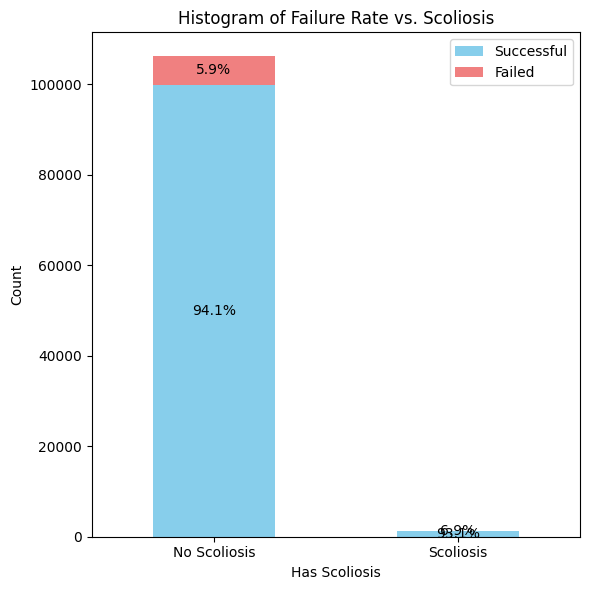

Table of Failure Rate vs. Scoliosis:


failed_catheter,0,1
has_scoliosis,,
0,99903,6246
1,1279,95


In [23]:
# prompt: create a histogram of the crosstab of has_scoliosis vs failure_rate

# Assuming 'neuraxial_catheter_df' is your DataFrame (as defined in the provided code)

# Group by 'has_scoliosis' and 'failed_catheter'
scoliosis_failure_counts = pd.crosstab(neuraxial_catheter_df['has_scoliosis'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = scoliosis_failure_counts.plot(kind='bar', stacked=True, figsize=(6, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Has Scoliosis')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Scoliosis')
plt.xticks(rotation=0, ha='center', ticks=[0, 1], labels=['No Scoliosis', 'Scoliosis'])
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Scoliosis:")
scoliosis_failure_counts

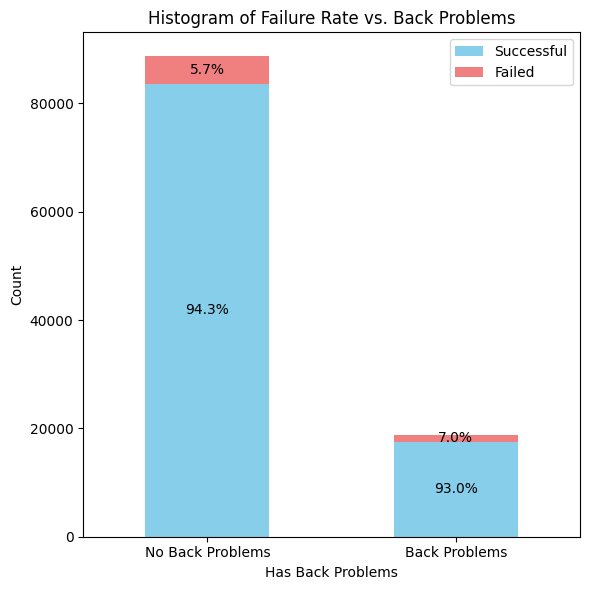

Table of Failure Rate vs. Back Problems:


failed_catheter,0,1
has_back_problems,,
0,83663,5028
1,17519,1313


In [24]:
# prompt: do the same but for has_back_problems

# Group by 'has_back_problems' and 'failed_catheter'
back_problems_failure_counts = pd.crosstab(neuraxial_catheter_df['has_back_problems'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = back_problems_failure_counts.plot(kind='bar', stacked=True, figsize=(6, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Has Back Problems')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Back Problems')
plt.xticks(rotation=0, ha='center', ticks=[0, 1], labels=['No Back Problems', 'Back Problems'])
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Back Problems:")
back_problems_failure_counts

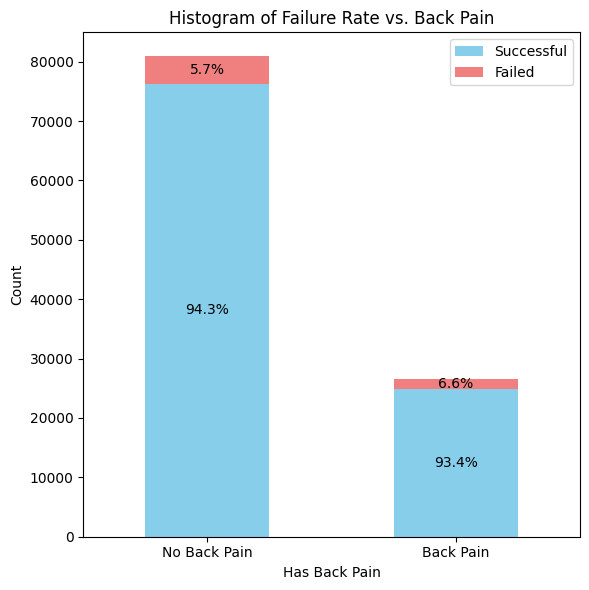

Table of Failure Rate vs. Back Pain:


failed_catheter,0,1
has_dorsalgia,,
0,76325,4585
1,24857,1756


In [25]:
# prompt: do the same but for has_dorsalgia

# Group by 'has_dorsalgia' and 'failed_catheter'
back_pain_failure_counts = pd.crosstab(neuraxial_catheter_df['has_dorsalgia'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = back_pain_failure_counts.plot(kind='bar', stacked=True, figsize=(6, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Has Back Pain')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Back Pain')
plt.xticks(rotation=0, ha='center', ticks=[0, 1], labels=['No Back Pain', 'Back Pain'])
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Back Pain:")
back_pain_failure_counts

## Fetal Presentation

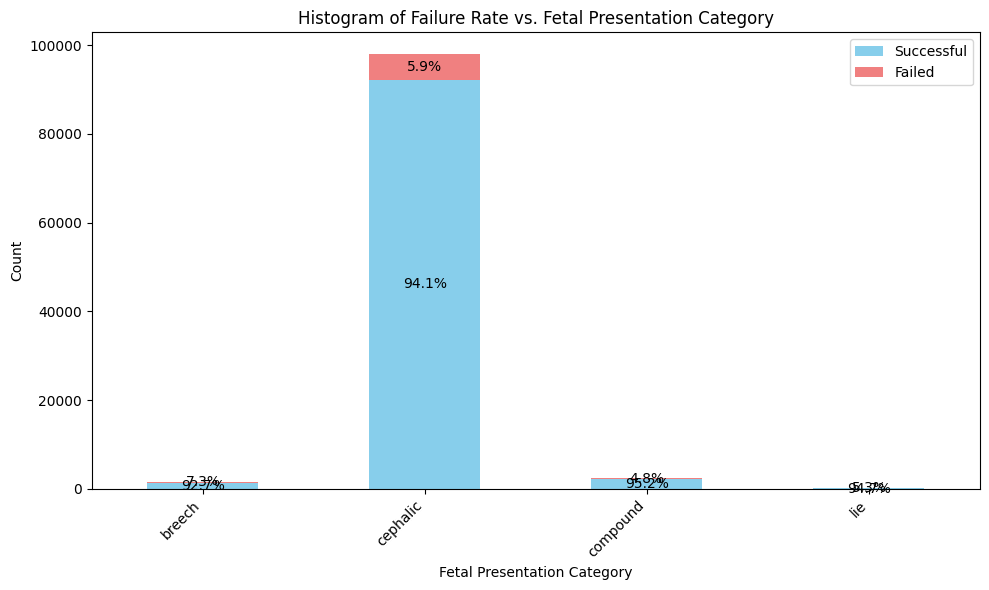

Table of Failure Rate vs. Fetal Presentation Category:


failed_catheter,0,1
fetal_presentation_category_2243,,
breech,1401,110
cephalic,92258,5748
compound,2284,115
lie,196,11


In [26]:
# prompt: do the same histogram, but for fetal_presentation_category vs failure

# Group by 'fetal_presentation_category_2243' and 'failed_catheter'
fetal_presentation_failure_counts = pd.crosstab(neuraxial_catheter_df['fetal_presentation_category_2243'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = fetal_presentation_failure_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Fetal Presentation Category')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Fetal Presentation Category')
plt.xticks(rotation=45, ha='right')
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Fetal Presentation Category:")
fetal_presentation_failure_counts

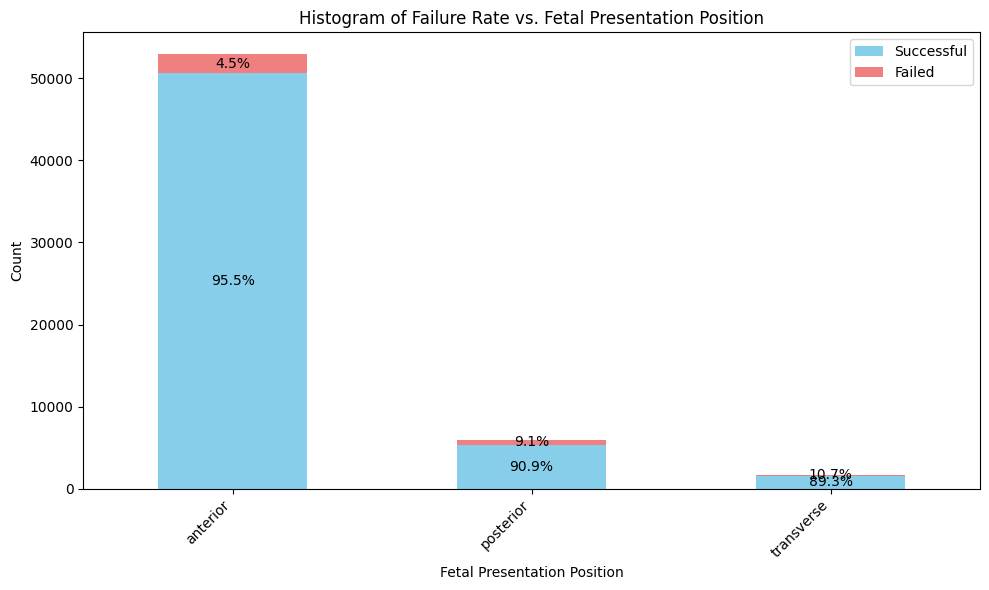

Table of Failure Rate vs. Fetal Presentation Position:


failed_catheter,0,1
fetal_presentation_position_2247,,
anterior,50605,2363
posterior,5363,535
transverse,1508,181


In [27]:
# prompt: do the same histogram, but for fetal_presentation_position vs failure

# Assuming 'neuraxial_catheter_df' is your DataFrame (as defined in the provided code)

# Group by 'fetal_presentation_position_2247' and 'failed_catheter'
fetal_position_failure_counts = pd.crosstab(neuraxial_catheter_df['fetal_presentation_position_2247'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = fetal_position_failure_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Fetal Presentation Position')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Fetal Presentation Position')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Fetal Presentation Position:")
fetal_position_failure_counts

## Race and SES

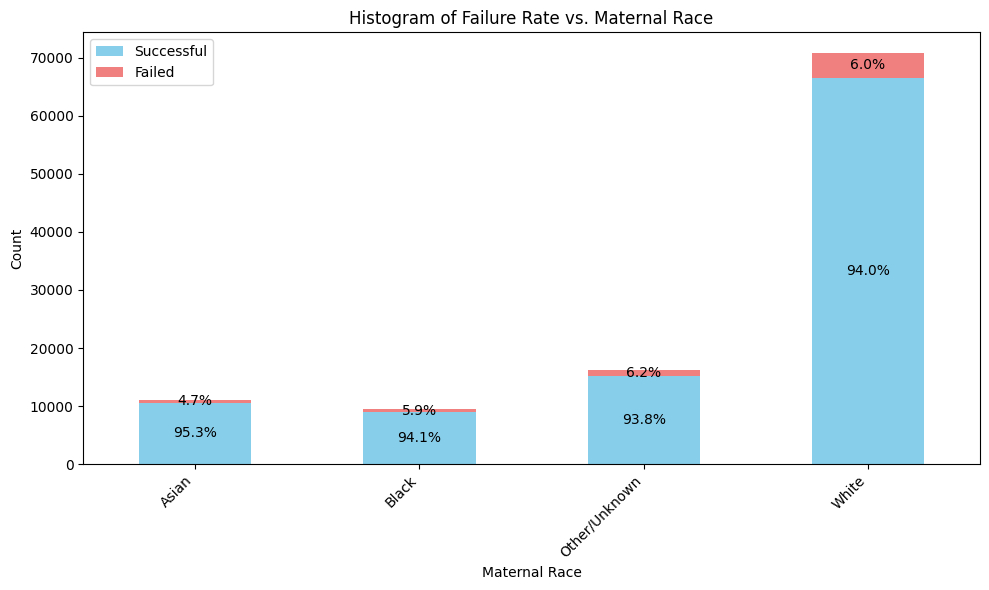

Table of Failure Rate vs. Maternal Race:


failed_catheter,0,1
maternal_race,,
Asian,10587,520
Black,8915,560
Other/Unknown,15148,993
White,66532,4268


In [28]:
# prompt: do the same histogram, but for maternal_race vs failure

# Group by 'maternal_race' and 'failed_catheter'
race_failure_counts = pd.crosstab(neuraxial_catheter_df['maternal_race'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = race_failure_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Maternal Race')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Maternal Race')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Maternal Race:")
race_failure_counts

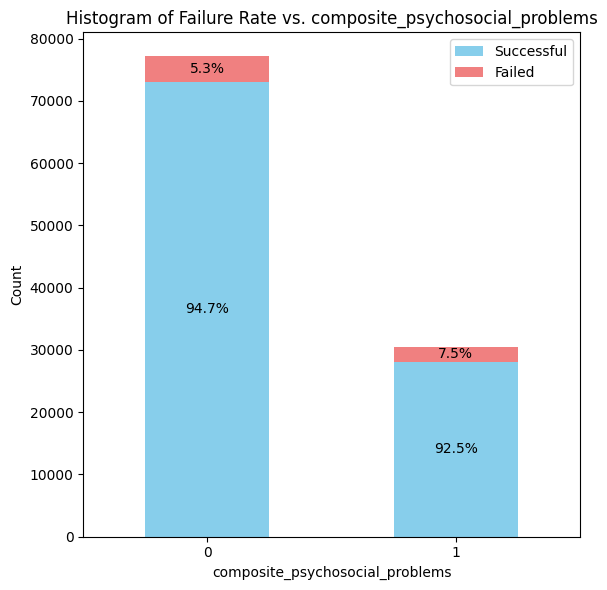

Table of Failure Rate vs. composite_psychosocial_problems:


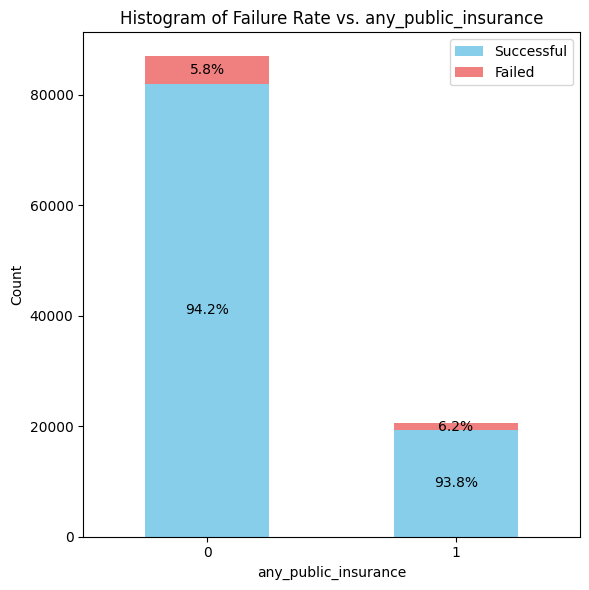

Table of Failure Rate vs. any_public_insurance:


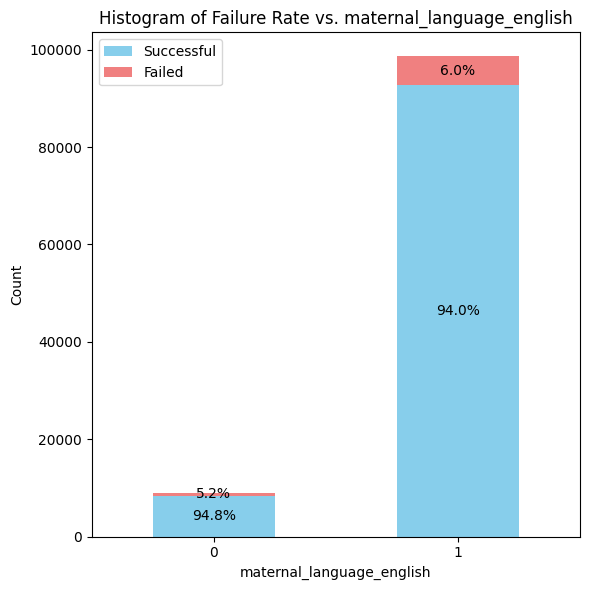

Table of Failure Rate vs. maternal_language_english:


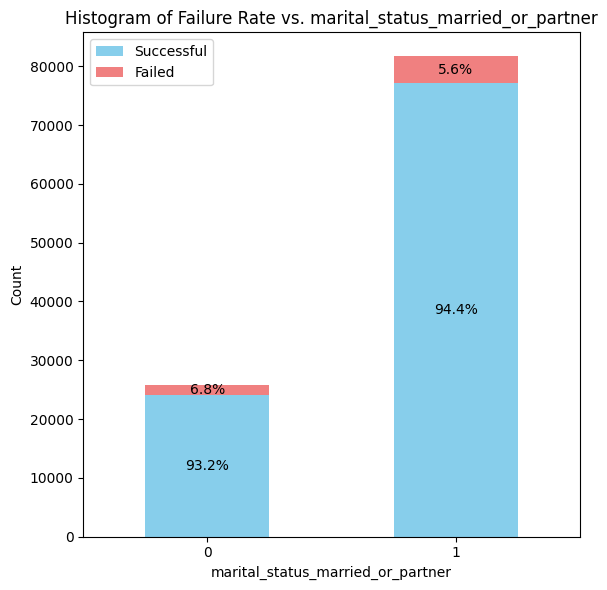

Table of Failure Rate vs. marital_status_married_or_partner:


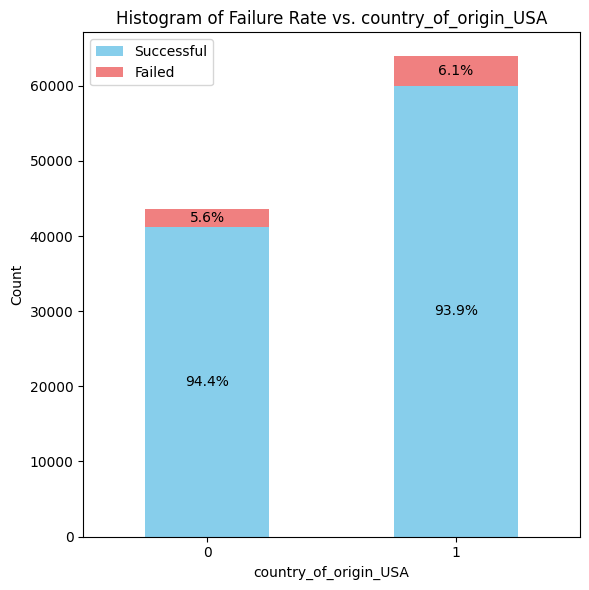

Table of Failure Rate vs. country_of_origin_USA:


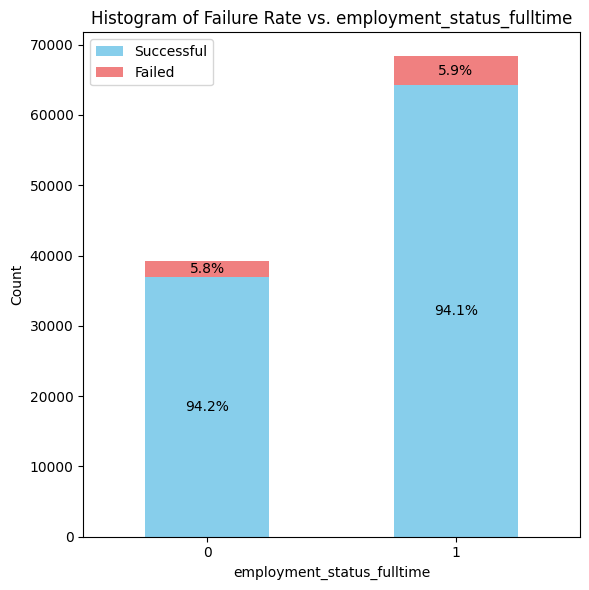

Table of Failure Rate vs. employment_status_fulltime:


failed_catheter,0,1
employment_status_fulltime,,
0,36899,2277
1,64283,4064


In [29]:
# prompt: do the same histogram, but for each of these: 32. composite_psychosocial_problems ||| int64
# 33. any_public_insurance ||| int64
# 34. maternal_language_english ||| int64
# 35. marital_status_married_or_partner ||| int64
# 36. country_of_origin_USA ||| int64
# 37. employment_status_fulltime ||| int64

# Assuming 'neuraxial_catheter_df' is your DataFrame

columns_to_analyze = [
    'composite_psychosocial_problems',
    'any_public_insurance',
    'maternal_language_english',
    'marital_status_married_or_partner',
    'country_of_origin_USA',
    'employment_status_fulltime'
]

for column in columns_to_analyze:
  # Group by the current column and 'failed_catheter'
  failure_counts = pd.crosstab(neuraxial_catheter_df[column], neuraxial_catheter_df['failed_catheter'])

  # Create a stacked bar chart
  ax = failure_counts.plot(kind='bar', stacked=True, figsize=(6, 6), color=['skyblue', 'lightcoral'])

  # Add percentages within each bar
  for p in ax.patches:
      width = p.get_width()
      height = p.get_height()
      x, y = p.get_xy()
      ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

  plt.xlabel(column)
  plt.ylabel('Count')
  plt.title(f'Histogram of Failure Rate vs. {column}')

  # Customize x-axis ticks and labels (adjust as needed for each column)
  plt.xticks(rotation=0, ha='center')

  plt.legend(['Successful', 'Failed'])
  plt.tight_layout()
  plt.show()

  # Display the table with the same information
  print(f"Table of Failure Rate vs. {column}:")
failure_counts

## Pain

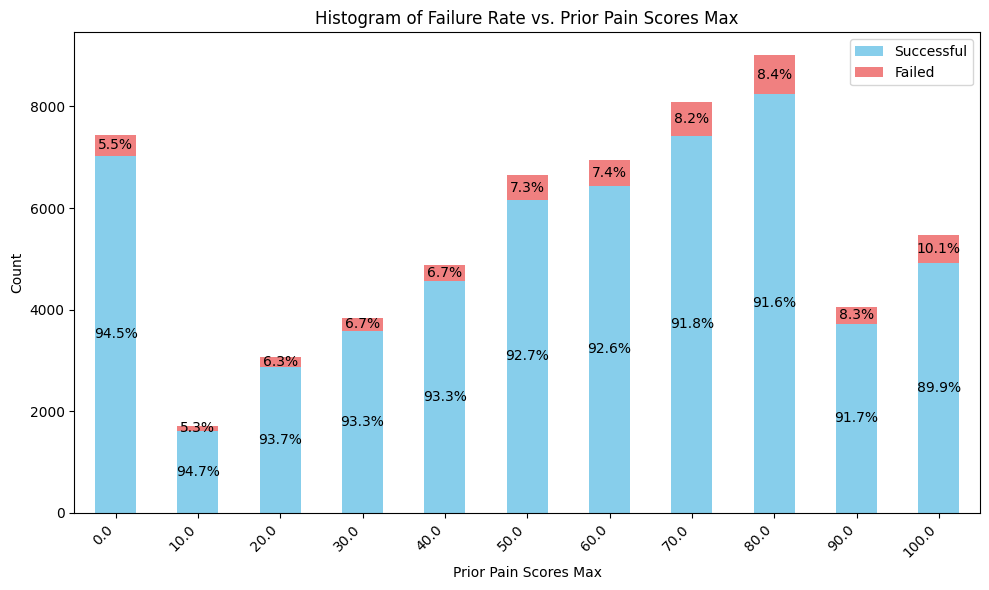

Table of Failure Rate vs. Prior Pain Scores Max:


failed_catheter,0,1
prior_pain_scores_max,,
0.0,7028,411
10.0,1616,91
20.0,2870,192
30.0,3583,259
40.0,4560,327
50.0,6157,488
60.0,6441,512
70.0,7419,659
80.0,8248,760


In [30]:
# prompt: do the same histogram but for prior_pain_scores_max

# Assuming 'neuraxial_catheter_df' is your DataFrame

# Group by 'prior_pain_scores_max' and 'failed_catheter'
prior_pain_failure_counts = pd.crosstab(neuraxial_catheter_df['prior_pain_scores_max'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = prior_pain_failure_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Prior Pain Scores Max')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Prior Pain Scores Max')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Prior Pain Scores Max:")
prior_pain_failure_counts

## Gravidity and Parity

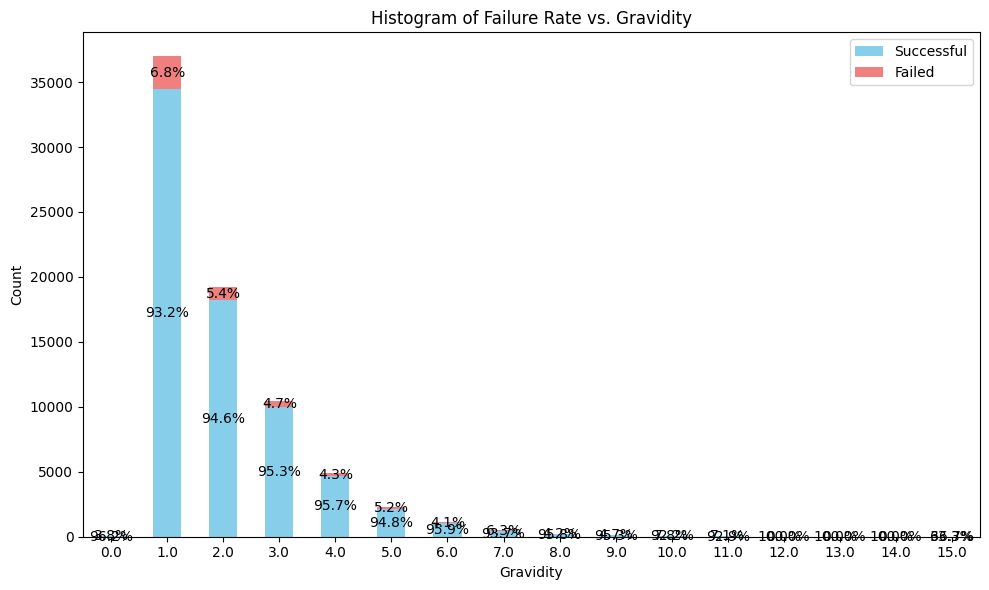

Table of Failure Rate vs. Gravidity:
failed_catheter      0     1
gravidity_2047              
0.0                 25     1
1.0              34482  2501
2.0              18199  1046
3.0               9982   494
4.0               4668   210
5.0               2153   119
6.0               1062    45
7.0                458    31
8.0                230    10
9.0                122     6
10.0                59     5
11.0                26     2
12.0                14     0
13.0                 9     0
14.0                 6     0
15.0                 2     1


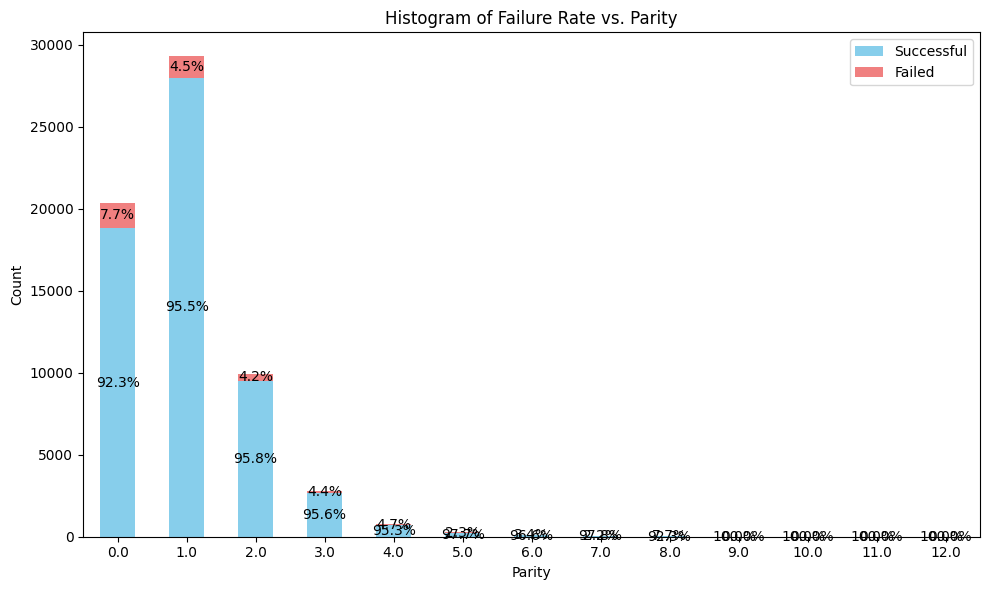

Table of Failure Rate vs. Parity:


failed_catheter,0,1
parity_2048,,
0.0,18795,1576
1.0,27973,1306
2.0,9521,418
3.0,2656,123
4.0,726,36
5.0,254,6
6.0,86,3
7.0,45,1
8.0,24,2


In [31]:
# prompt: do the same histogram but for gravidity_2047 and parity_2048

# Assuming 'neuraxial_catheter_df' is your DataFrame

# Group by 'gravidity_2047' and 'failed_catheter'
gravidity_failure_counts = pd.crosstab(neuraxial_catheter_df['gravidity_2047'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = gravidity_failure_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Gravidity')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Gravidity')
plt.xticks(rotation=0)  # Adjust rotation if needed
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table
print("Table of Failure Rate vs. Gravidity:")
print(gravidity_failure_counts)


# Group by 'parity_2048' and 'failed_catheter'
parity_failure_counts = pd.crosstab(neuraxial_catheter_df['parity_2048'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = parity_failure_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Parity')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Parity')
plt.xticks(rotation=0)  # Adjust rotation if needed
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table
print("Table of Failure Rate vs. Parity:")
parity_failure_counts

## BMI / height / weight

C:\Users\User\AppData\Local\Temp\ipykernel_20072\1136609773.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['bmi_end_pregnancy_bin'] = (df_plot['bmi_end_pregnancy_2044'] // 1).astype(int)


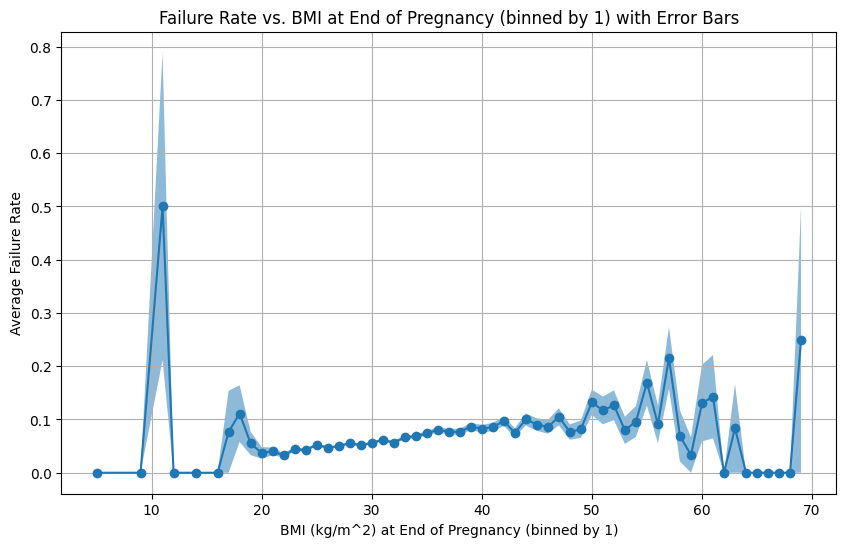

In [32]:
# prompt: plot bmi end pregnancy against failure rate using binning as above.

# Assuming 'bmi_end_pregnancy' and 'failed_catheter' are columns in your DataFrame 'df'
df_plot = neuraxial_catheter_df.dropna(subset=['bmi_end_pregnancy_2044', 'failed_catheter'])

# Bin the bmi_end_pregnancy
df_plot['bmi_end_pregnancy_bin'] = (df_plot['bmi_end_pregnancy_2044'] // 1).astype(int)

# Group by the binned bmi_end_pregnancy and calculate the mean and standard error of the mean of failed_catheter
failure_by_bmi = df_plot.groupby('bmi_end_pregnancy_bin')['failed_catheter'].agg(['mean', 'sem'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(failure_by_bmi.index, failure_by_bmi['mean'], marker='o')
plt.fill_between(failure_by_bmi.index,
                 failure_by_bmi['mean'] - failure_by_bmi['sem'],
                 failure_by_bmi['mean'] + failure_by_bmi['sem'],
                 alpha=0.5) # Add shaded error bars

plt.xlabel('BMI (kg/m^2) at End of Pregnancy (binned by 1)')
plt.ylabel('Average Failure Rate')
plt.title('Failure Rate vs. BMI at End of Pregnancy (binned by 1) with Error Bars')
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20072\1989362899.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['weight_end_pregnancy_bin'] = (df_plot['maternal_weight_end_pregnancy_2045'] // 10).astype(int) * 10


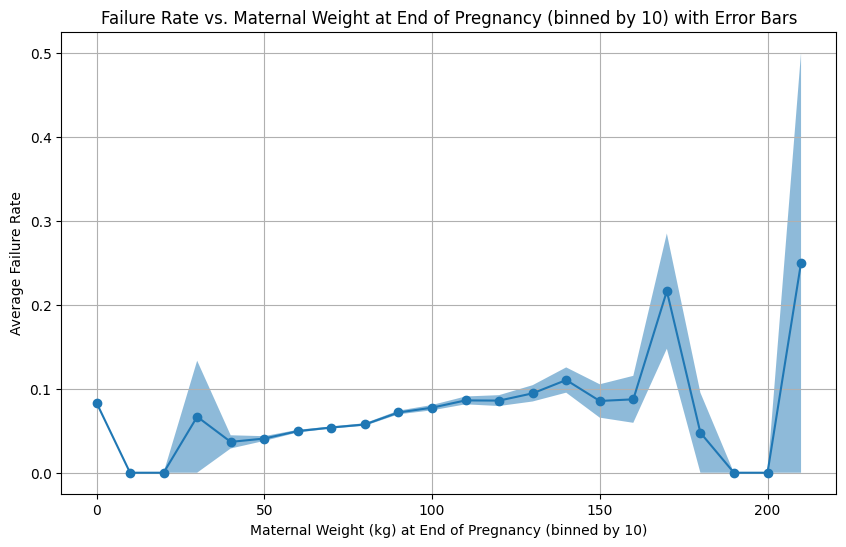

In [33]:
# prompt: # prompt: plot weight end pregnancy against failure rate using binning as above.

# Assuming 'maternal_weight_end_pregnancy_2045' and 'failed_catheter' are columns in your DataFrame 'df'
df_plot = neuraxial_catheter_df.dropna(subset=['maternal_weight_end_pregnancy_2045', 'failed_catheter'])

# Bin the maternal weight at the end of pregnancy
df_plot['weight_end_pregnancy_bin'] = (df_plot['maternal_weight_end_pregnancy_2045'] // 10).astype(int) * 10

# Group by the binned weight and calculate the mean and standard error of the mean of failed_catheter
failure_by_weight = df_plot.groupby('weight_end_pregnancy_bin')['failed_catheter'].agg(['mean', 'sem'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(failure_by_weight.index, failure_by_weight['mean'], marker='o')
plt.fill_between(failure_by_weight.index,
                 failure_by_weight['mean'] - failure_by_weight['sem'],
                 failure_by_weight['mean'] + failure_by_weight['sem'],
                 alpha=0.5)  # Add shaded error bars

plt.xlabel('Maternal Weight (kg) at End of Pregnancy (binned by 10)')
plt.ylabel('Average Failure Rate')
plt.title('Failure Rate vs. Maternal Weight at End of Pregnancy (binned by 10) with Error Bars')
plt.grid(True)
plt.show()

In [34]:
# prompt: do the same but for height

# Assuming 'height' is a column in your DataFrame 'df'
df_plot = neuraxial_catheter_df.dropna(subset=['maternal_height_2046', 'failed_catheter'])

# Drop heights greater than 250
df_plot = df_plot[df_plot['maternal_height_2046'] <= 250]

# Bin the height
df_plot['height_bin'] = (df_plot['maternal_height_2046'] // 1).astype(int)

# Group by the binned height and calculate the mean and standard error of the mean of failed_catheter
failure_by_height = df_plot.groupby('height_bin')['failed_catheter'].agg(['mean', 'sem'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(failure_by_height.index, failure_by_height['mean'], marker='o')
plt.fill_between(failure_by_height.index,
                 failure_by_height['mean'] - failure_by_height['sem'],
                 failure_by_height['mean'] + failure_by_height['sem'],
                 alpha=0.5) # Add shaded error bars

plt.xlabel('Height (binned by 1)')
plt.ylabel('Average Failure Rate')
plt.title('Failure Rate vs. Height (binned by 1) with Error Bars')
plt.grid(True)
plt.show()

KeyError: ['maternal_height_2046']

## Needle Type

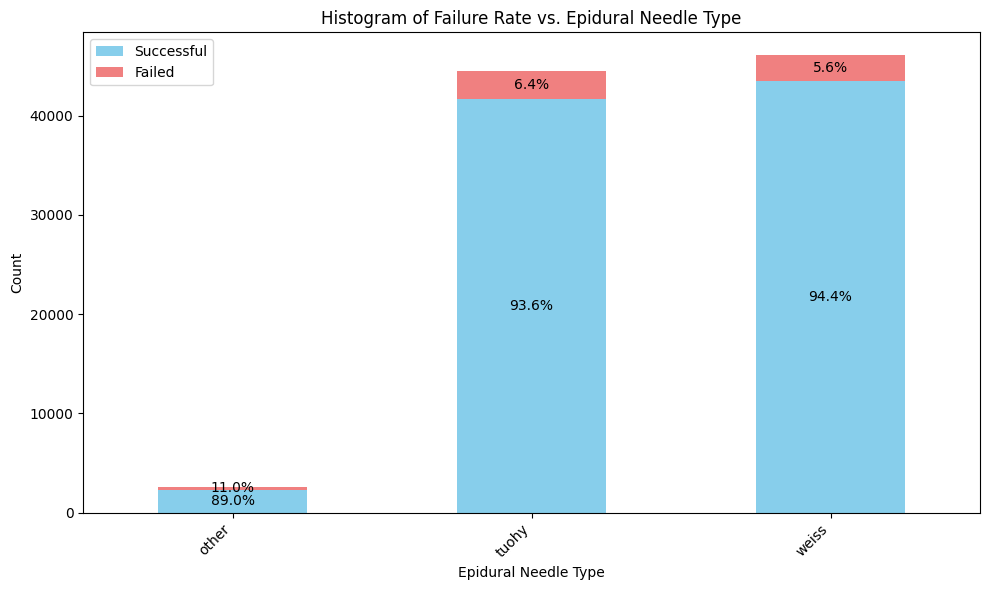

Table of Failure Rate vs. Epidural Needle Type:


failed_catheter,0,1
epidural_needle_type,,
other,2309,286
tuohy,41684,2842
weiss,43507,2593


In [35]:
# prompt: do the same histogram but for epidural_needle_type

# Assuming 'epidural_df' is your DataFrame (as defined in the provided code)

# Group by 'epidural_needle_type' and 'failed_catheter'
needle_type_failure_counts = pd.crosstab(epidural_df['epidural_needle_type'], epidural_df['failed_catheter'])

# Create a stacked bar chart
ax = needle_type_failure_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Epidural Needle Type')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Epidural Needle Type')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Epidural Needle Type:")
needle_type_failure_counts

## Paresthesias

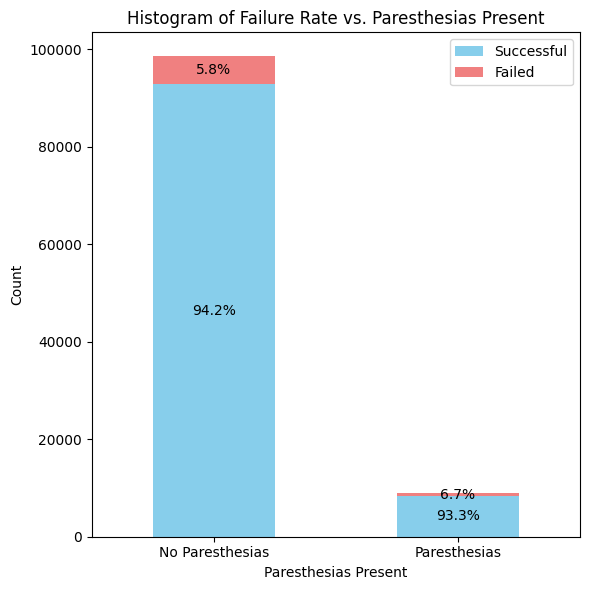

Table of Failure Rate vs. Paresthesias Present:


failed_catheter,0,1
paresthesias_present,,
0,92849,5744
1,8333,597


In [36]:
# prompt: do the same histogram but for paresthesias_present

# Group by 'paresthesias_present' and 'failed_catheter'
paresthesias_failure_counts = pd.crosstab(neuraxial_catheter_df['paresthesias_present'], neuraxial_catheter_df['failed_catheter'])

# Create a stacked bar chart
ax = paresthesias_failure_counts.plot(kind='bar', stacked=True, figsize=(6, 6), color=['skyblue', 'lightcoral'])

# Add percentages within each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height/sum([p.get_height() for p in ax.patches if p.get_x() == x]) * 100:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Paresthesias Present')
plt.ylabel('Count')
plt.title('Histogram of Failure Rate vs. Paresthesias Present')
plt.xticks(rotation=0, ha='center', ticks=[0, 1], labels=['No Paresthesias', 'Paresthesias'])
plt.legend(['Successful', 'Failed'])
plt.tight_layout()
plt.show()

# Display the table with the same information
print("Table of Failure Rate vs. Paresthesias Present:")
paresthesias_failure_counts

## Number of Attempts

In [37]:
# prompt: create a histogram of the number of attempts. Only show integers on the x-axis

# Assuming 'number_of_neuraxial_attempts' is a column in your DataFrame 'df'
attempts_counts = df['number_of_neuraxial_attempts'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(attempts_counts.index, attempts_counts.values)
plt.xlabel('Number of Attempts')
plt.ylabel('Count')
plt.title('Histogram of Number of Neuraxial Attempts')
plt.xticks(range(int(attempts_counts.index.min()), int(attempts_counts.index.max()) + 1))  # Show only integer ticks on x-axis
plt.tight_layout()
plt.show()


KeyError: 'number_of_neuraxial_attempts'

## Loss of Resistance Depth

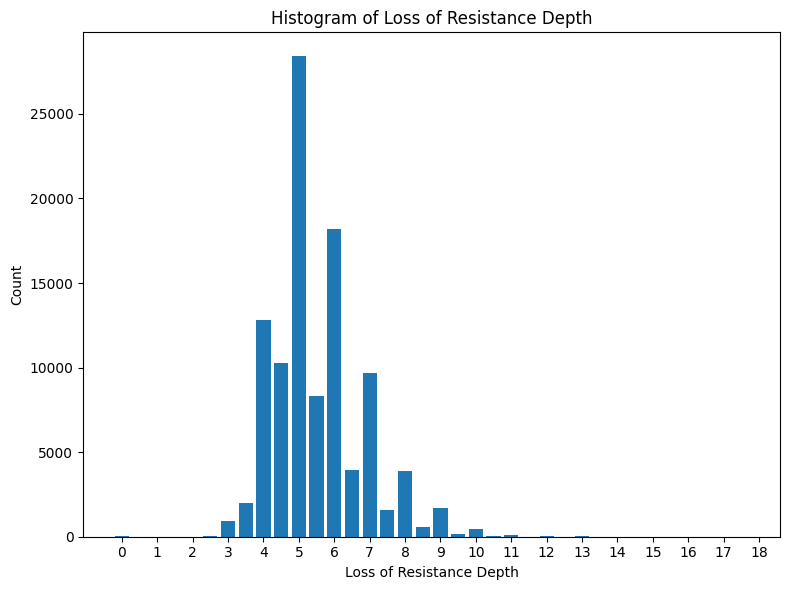

In [38]:
# prompt: create a histogram of loss of resistance depth. Center the bars over the tick marks and make space between the bars. Bins should be every 0.5

# Assuming 'lor_depth' is a column in your DataFrame 'df'
lor_depths = neuraxial_catheter_df['lor_depth'].dropna()  # Remove NaN values

# Create the histogram with centered bars and spacing
plt.figure(figsize=(8, 6))
plt.hist(lor_depths, bins=np.arange(lor_depths.min(), lor_depths.max() + 0.5, 0.5), rwidth=0.8, align='left')
plt.xlabel('Loss of Resistance Depth')
plt.ylabel('Count')
plt.title('Histogram of Loss of Resistance Depth')
plt.xticks(np.arange(0, lor_depths.max() + 0.5, 1))  # Set x-axis ticks to be at every 1
plt.tight_layout()
plt.show()


In [39]:
# prompt: Plot number of neuraxial attempts vs LOR depth on the x-axis. Add jiggle to both x and y axes

df_plot = neuraxial_catheter_df.dropna(subset=['number_of_neuraxial_attempts', 'lor_depth'])

# Add random jiggle to both x and y axes
jiggle_x = np.random.normal(scale = 0.1, size=len(df_plot))
jiggle_y = np.random.normal(scale = 0.1, size=len(df_plot))

plt.figure(figsize=(10, 6))
plt.scatter(df_plot['lor_depth'] + jiggle_x, df_plot['number_of_neuraxial_attempts'] + jiggle_y, alpha=0.5)
plt.xlabel('LOR Depth')
plt.ylabel('Number of Neuraxial Attempts')
plt.title('Number of Neuraxial Attempts vs. LOR Depth with Jiggle')
plt.show()


KeyError: ['number_of_neuraxial_attempts']

In [40]:
# prompt: do the same but add shaded error bars for +/- standard error of the mean

# Assuming 'number_of_neuraxial_attempts' and 'failed_catheter' are columns in your DataFrame 'df'
df_plot = neuraxial_catheter_df.dropna(subset=['number_of_neuraxial_attempts'])

# Group by number of attempts and calculate the mean and standard error of the mean of failed_catheter
failure_by_attempts = df_plot.groupby('number_of_neuraxial_attempts')['failed_catheter'].agg(['mean', 'sem'])

# Create the plot with error bars
plt.figure(figsize=(10, 6))
plt.plot(failure_by_attempts.index, failure_by_attempts['mean'], marker='o')
plt.fill_between(failure_by_attempts.index,
                 failure_by_attempts['mean'] - failure_by_attempts['sem'],
                 failure_by_attempts['mean'] + failure_by_attempts['sem'],
                 alpha=0.2) # Add shaded error bars
plt.errorbar(failure_by_attempts.index, failure_by_attempts['mean'], yerr=failure_by_attempts['sem'], fmt='o-', capsize=5, elinewidth=1)  # Added error bars
plt.xlabel('Number of Neuraxial Attempts')
plt.ylabel('Average Failure Rate')
plt.title('Failure Rate vs. Number of Neuraxial Attempts with Error Bars')
plt.xticks(np.arange(0, failure_by_attempts['number_of_neuraxial_attempts'].max() + 0.5, 1))  # Set x-axis ticks to be at every 0.5
plt.grid(True)
plt.show()

KeyError: ['number_of_neuraxial_attempts']

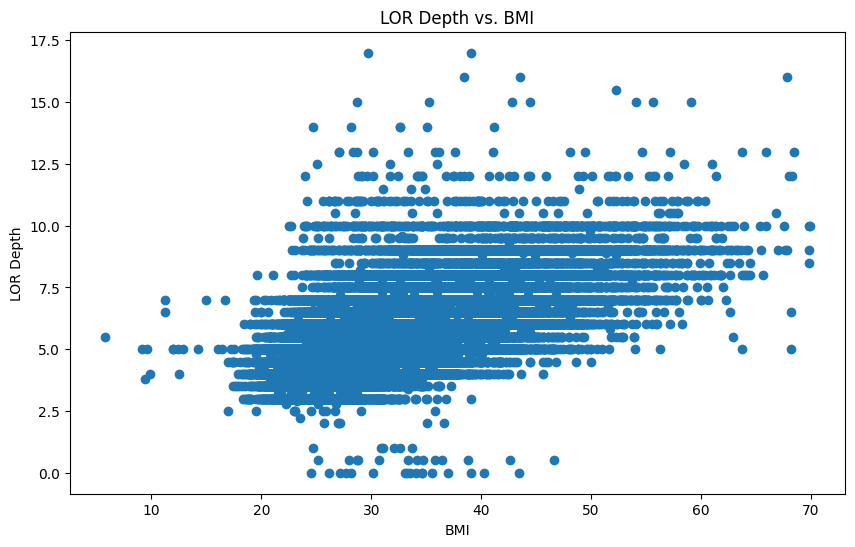

In [41]:
# prompt: Plot lor-depth against bmi

# Assuming 'lor_depth' and 'bmi_end_pregnancy_2044' are columns in your DataFrame 'df'
df_plot = neuraxial_catheter_df.dropna(subset=['lor_depth', 'bmi_end_pregnancy_2044'])

plt.figure(figsize=(10, 6))
plt.scatter(df_plot['bmi_end_pregnancy_2044'], df_plot['lor_depth'])
plt.xlabel('BMI')
plt.ylabel('LOR Depth')
plt.title('LOR Depth vs. BMI')
plt.show()

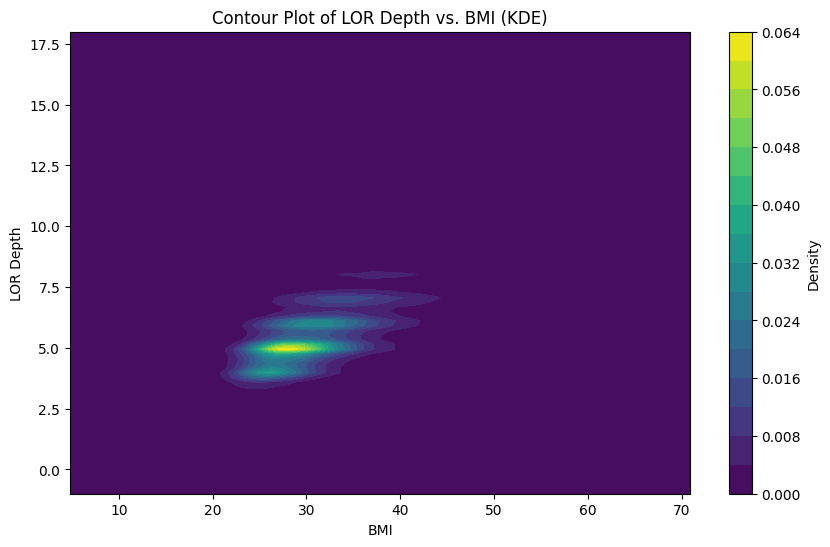

In [42]:
from scipy.stats import gaussian_kde

# Extract the data, dropping NaNs
df_plot = neuraxial_catheter_df.dropna(subset=['lor_depth', 'bmi_end_pregnancy_2044'])
x = df_plot['bmi_end_pregnancy_2044'].values
y = df_plot['lor_depth'].values

# Perform kernel density estimation
xy = np.vstack([x, y])
kde = gaussian_kde(xy)

# Define grid over data range
xmin, xmax = x.min() - 1, x.max() + 1
ymin, ymax = y.min() - 1, y.max() + 1
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kde(positions).T, X.shape)

# Create the contour plot
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=15, cmap='viridis')
plt.colorbar(label='Density')
plt.xlabel('BMI')
plt.ylabel('LOR Depth')
plt.title('Contour Plot of LOR Depth vs. BMI (KDE)')
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_20072\3491618410.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['lor_depth_bin'] = (df_plot['lor_depth'] // 1).astype(int)


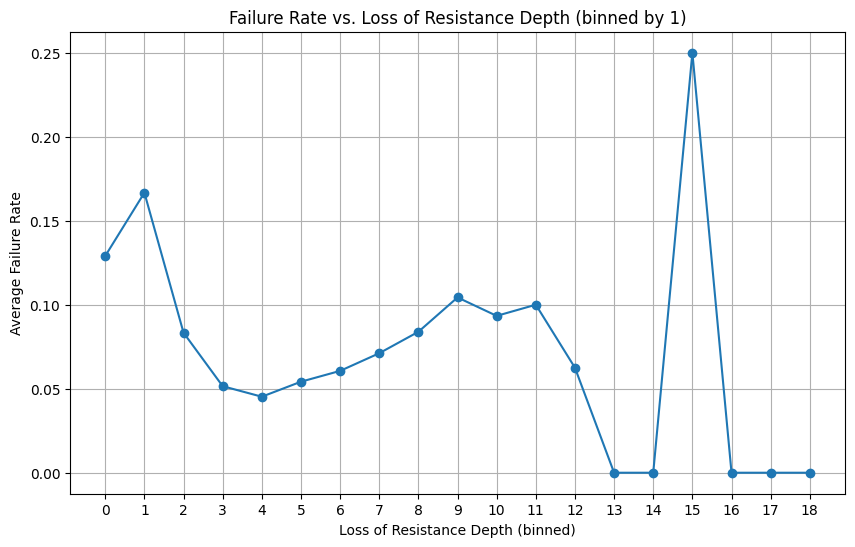

In [43]:
# prompt: do the same but for failure vs loss of resistance depth. Bin the depth by units of 1

# Assuming 'lor_depth' and 'failed_catheter' are columns in your DataFrame 'df'
df_plot = neuraxial_catheter_df.dropna(subset=['lor_depth', 'failed_catheter'])

# Bin the LOR depth
df_plot['lor_depth_bin'] = (df_plot['lor_depth'] // 1).astype(int)

# Group by the binned LOR depth and calculate the mean of failed_catheter
failure_by_lor_depth = df_plot.groupby('lor_depth_bin')['failed_catheter'].mean()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(failure_by_lor_depth.index, failure_by_lor_depth.values, marker='o')
plt.xlabel('Loss of Resistance Depth (binned)')
plt.ylabel('Average Failure Rate')
plt.title('Failure Rate vs. Loss of Resistance Depth (binned by 1)')
plt.xticks(np.arange(0, df_plot['lor_depth'].max() + 0.5, 1))  # Set x-axis ticks to be at every 1
plt.grid(True)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20072\1282687347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['lor_depth_bin'] = (df_plot['lor_depth'] // 1).astype(int)


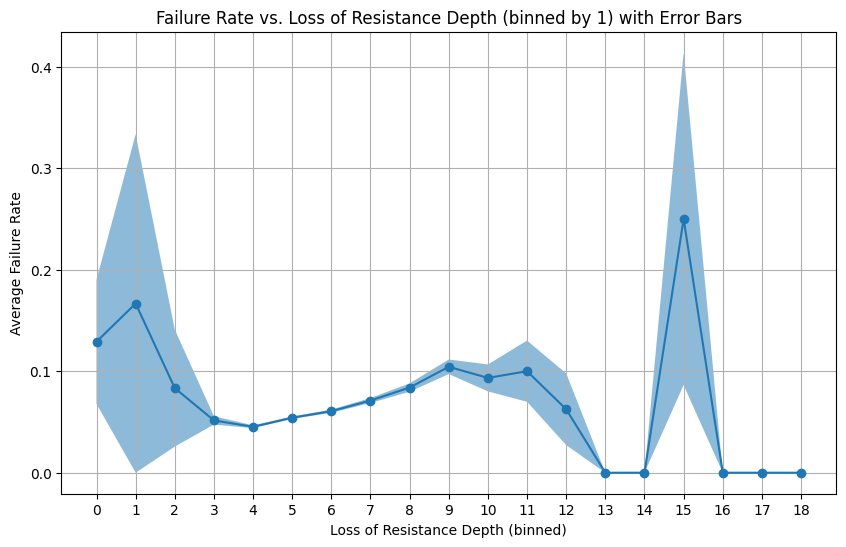

In [44]:
# prompt: Reproduce the same plot, but add shaded error bars for +/- standard error of the mean

# Assuming 'lor_depth' and 'failed_catheter' are columns in your DataFrame 'df'
df_plot = neuraxial_catheter_df.dropna(subset=['lor_depth', 'failed_catheter'])

# Bin the LOR depth
df_plot['lor_depth_bin'] = (df_plot['lor_depth'] // 1).astype(int)

# Group by the binned LOR depth and calculate the mean and standard error of the mean of failed_catheter
failure_by_lor_depth = df_plot.groupby('lor_depth_bin')['failed_catheter'].agg(['mean', 'sem'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(failure_by_lor_depth.index, failure_by_lor_depth['mean'], marker='o')
plt.fill_between(failure_by_lor_depth.index,
                 failure_by_lor_depth['mean'] - failure_by_lor_depth['sem'],
                 failure_by_lor_depth['mean'] + failure_by_lor_depth['sem'],
                 alpha=0.5) # Add shaded error bars

plt.xlabel('Loss of Resistance Depth (binned)')
plt.ylabel('Average Failure Rate')
plt.title('Failure Rate vs. Loss of Resistance Depth (binned by 1) with Error Bars')
plt.xticks(np.arange(0, df_plot['lor_depth'].max() + 0.5, 1))  # Set x-axis ticks to be at every 1
plt.grid(True)
plt.show()

For failed_catheter=0, slope = 0.13, intercept = 1.33
For failed_catheter=1, slope = 0.13, intercept = 1.41


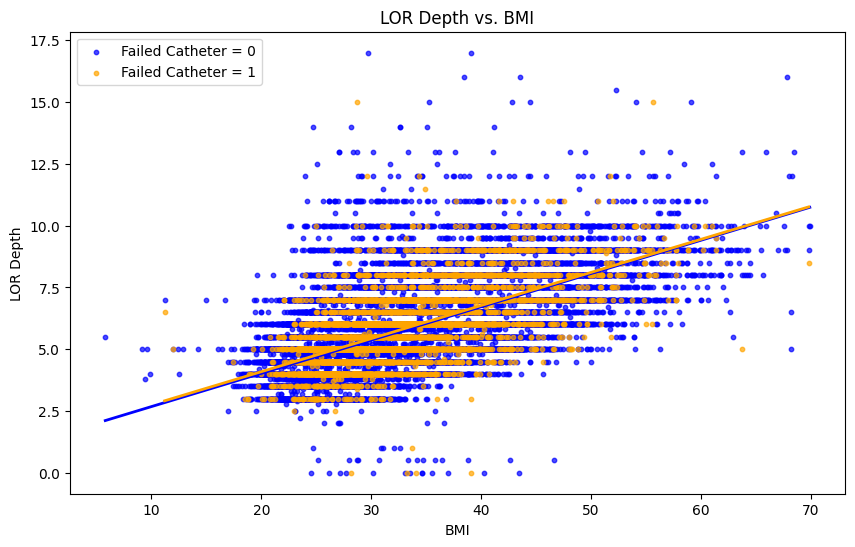

In [45]:

# Drop rows with NaNs
df_plot = neuraxial_catheter_df.dropna(
    subset=['lor_depth', 'bmi_end_pregnancy_2044', 'failed_catheter']
)

# Separate the data by failed_catheter category
df_0 = df_plot[df_plot['failed_catheter'] == 0]
df_1 = df_plot[df_plot['failed_catheter'] == 1]

plt.figure(figsize=(10, 6))

# Scatter plot for failed_catheter = 0
plt.scatter(
    df_0['bmi_end_pregnancy_2044'],
    df_0['lor_depth'],
    s=10, 
    alpha=0.7,
    color='blue',
    label='Failed Catheter = 0'
)

# Scatter plot for failed_catheter = 1
plt.scatter(
    df_1['bmi_end_pregnancy_2044'],
    df_1['lor_depth'],
    s=10, 
    alpha=0.7,
    color='orange',
    label='Failed Catheter = 1'
)

# --- Calculate and plot regression line for failed_catheter = 0 ---
p0 = np.polyfit(df_0['bmi_end_pregnancy_2044'], df_0['lor_depth'], deg=1)  # slope, intercept
slope_0, intercept_0 = p0
print(f"For failed_catheter=0, slope = {slope_0:.2f}, intercept = {intercept_0:.2f}")

x_vals_0 = np.linspace(df_0['bmi_end_pregnancy_2044'].min(), df_0['bmi_end_pregnancy_2044'].max(), 100)
y_vals_0 = np.polyval(p0, x_vals_0)
plt.plot(x_vals_0, y_vals_0, color='blue', linewidth=2)

# --- Calculate and plot regression line for failed_catheter = 1 ---
p1 = np.polyfit(df_1['bmi_end_pregnancy_2044'], df_1['lor_depth'], deg=1)
slope_1, intercept_1 = p1
print(f"For failed_catheter=1, slope = {slope_1:.2f}, intercept = {intercept_1:.2f}")

x_vals_1 = np.linspace(df_1['bmi_end_pregnancy_2044'].min(), df_1['bmi_end_pregnancy_2044'].max(), 100)
y_vals_1 = np.polyval(p1, x_vals_1)
plt.plot(x_vals_1, y_vals_1, color='orange', linewidth=2)

# Labels and legend
plt.xlabel('BMI')
plt.ylabel('LOR Depth')
plt.title('LOR Depth vs. BMI')
plt.legend()

plt.show()

## Gestational Age and Weight

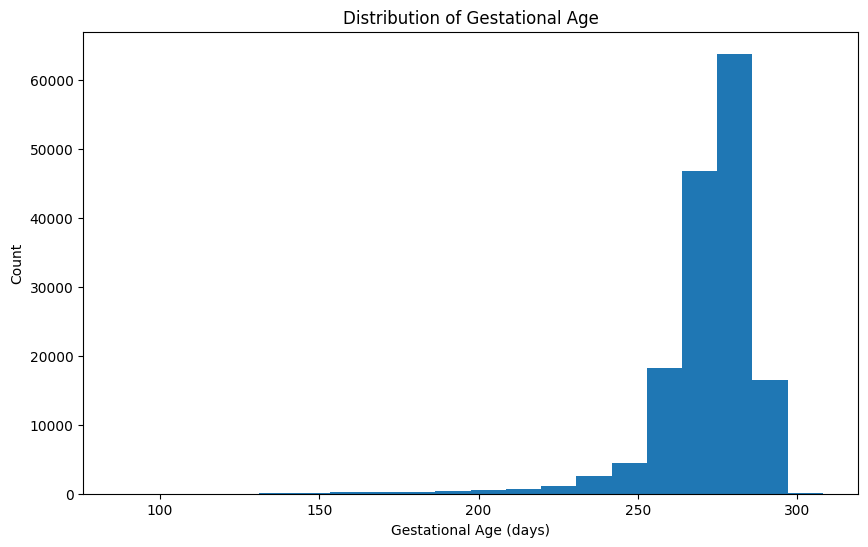

C:\Users\User\AppData\Local\Temp\ipykernel_20072\2166404301.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['gestational_age_bin'] = (df_plot['gestational_age_2052'] // 7).astype(int) * 7


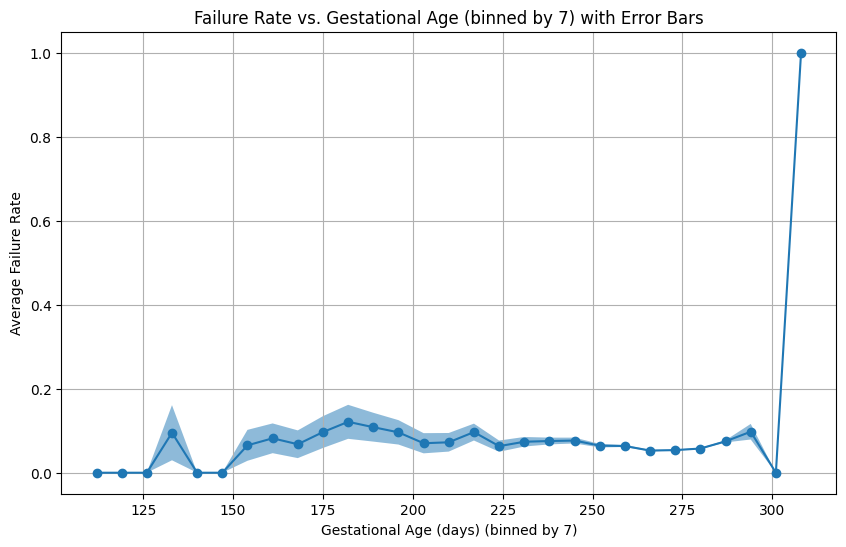

In [46]:
# prompt: do the same but for gestational age

# Histogram of gestational age
plt.figure(figsize=(10, 6))
plt.hist(df['gestational_age_2052'].dropna(), bins=20) # Adjust bins as needed
plt.xlabel('Gestational Age (days)')
plt.ylabel('Count')
plt.title('Distribution of Gestational Age')
plt.show()

# Analyze gestational age in relation to failed catheter
df_plot = neuraxial_catheter_df.dropna(subset=['gestational_age_2052', 'failed_catheter'])
df_plot['gestational_age_bin'] = (df_plot['gestational_age_2052'] // 7).astype(int) * 7
failure_by_gestational_age = df_plot.groupby('gestational_age_bin')['failed_catheter'].agg(['mean', 'sem'])

plt.figure(figsize=(10, 6))
plt.plot(failure_by_gestational_age.index, failure_by_gestational_age['mean'], marker='o')
plt.fill_between(failure_by_gestational_age.index,
                failure_by_gestational_age['mean'] - failure_by_gestational_age['sem'],
                failure_by_gestational_age['mean'] + failure_by_gestational_age['sem'],
                alpha=0.5)
plt.xlabel('Gestational Age (days) (binned by 7)')
plt.ylabel('Average Failure Rate')
plt.title('Failure Rate vs. Gestational Age (binned by 7) with Error Bars')
plt.grid(True)
plt.show()

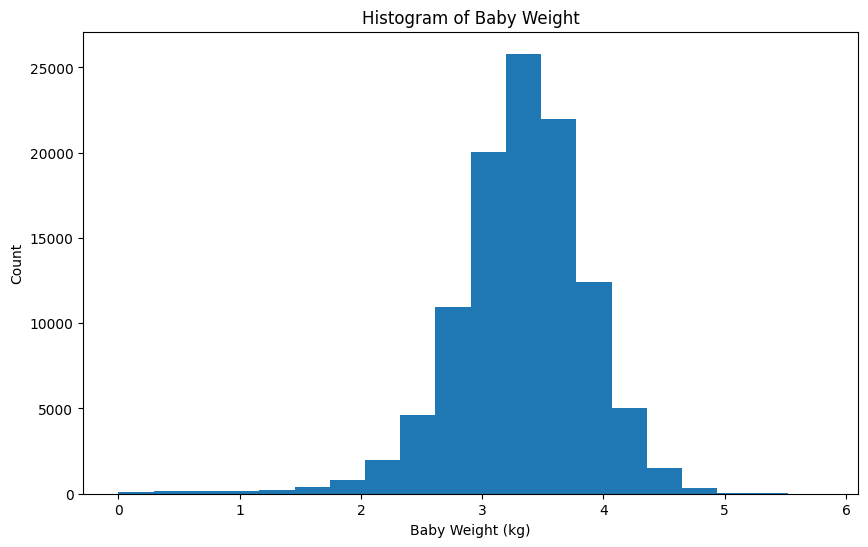

C:\Users\User\AppData\Local\Temp\ipykernel_20072\2857395661.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['baby_weight_bin'] = (df_plot['baby_weight_2196'] // 0.5) * 0.5


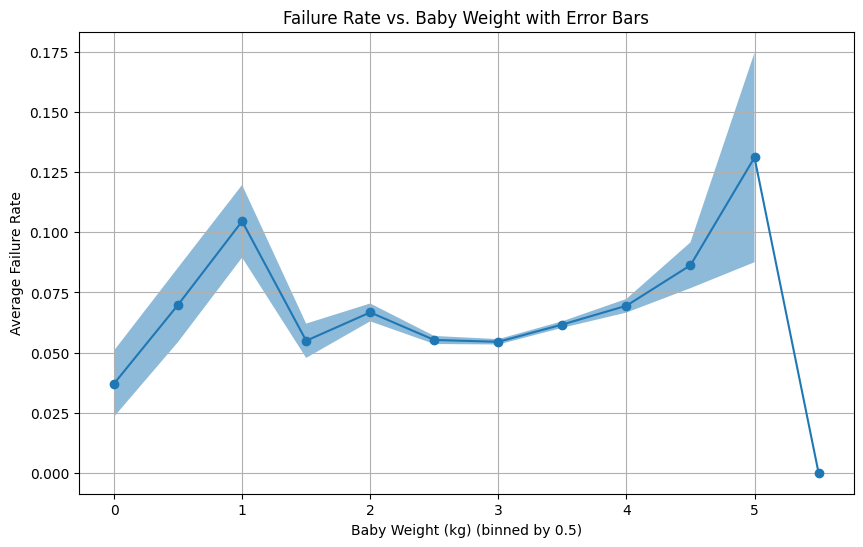

In [47]:
# prompt: do the same histogram and binned failure rate but for baby_weight_2196

# Assuming 'baby_weight_2196' is a column in your DataFrame 'df' or 'neuraxial_catheter_df'
plt.figure(figsize=(10, 6))
plt.hist(neuraxial_catheter_df['baby_weight_2196'].dropna(), bins=20)  # Adjust bins as needed
plt.xlabel('Baby Weight (kg)')
plt.ylabel('Count')
plt.title('Histogram of Baby Weight')
plt.show()

# Assuming 'neuraxial_catheter_df' is your DataFrame

df_plot = neuraxial_catheter_df.dropna(subset=['baby_weight_2196', 'failed_catheter'])

# Bin the baby weight
df_plot['baby_weight_bin'] = (df_plot['baby_weight_2196'] // 0.5) * 0.5

# Group by the binned baby weight and calculate the mean and standard error of the mean of failed_catheter
failure_by_baby_weight = df_plot.groupby('baby_weight_bin')['failed_catheter'].agg(['mean', 'sem'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(failure_by_baby_weight.index, failure_by_baby_weight['mean'], marker='o')
plt.fill_between(failure_by_baby_weight.index,
                 failure_by_baby_weight['mean'] - failure_by_baby_weight['sem'],
                 failure_by_baby_weight['mean'] + failure_by_baby_weight['sem'],
                 alpha=0.5)  # Add shaded error bars

plt.xlabel('Baby Weight (kg) (binned by 0.5)')
plt.ylabel('Average Failure Rate')
plt.title('Failure Rate vs. Baby Weight with Error Bars')
plt.grid(True)
plt.show()

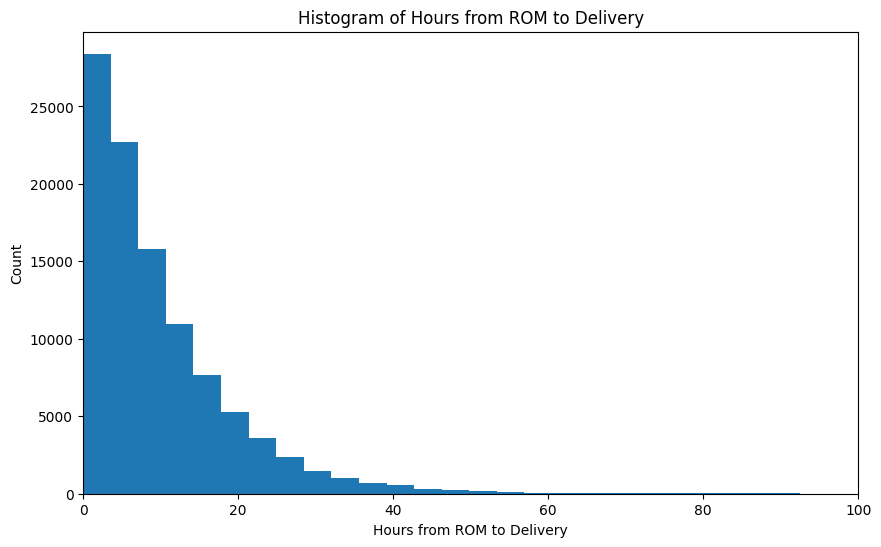

In [48]:
# prompt: do the same count histogram but for secs_rom_thru_delivery_2197

# Assuming 'neuraxial_catheter_df' is your DataFrame

# Drop NaN values in 'secs_rom_thru_delivery_2197'
df_plot = neuraxial_catheter_df.dropna(subset=['rom_thru_delivery_hours'])

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_plot['rom_thru_delivery_hours'], bins=200)  # Adjust bins as needed
plt.xlabel('Hours from ROM to Delivery')
plt.xlim(0,100)
plt.ylabel('Count')
plt.title('Histogram of Hours from ROM to Delivery')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_20072\1238184939.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['rom_thru_delivery_hours_bin'] = (df_plot['rom_thru_delivery_hours'] // 1).astype(int)


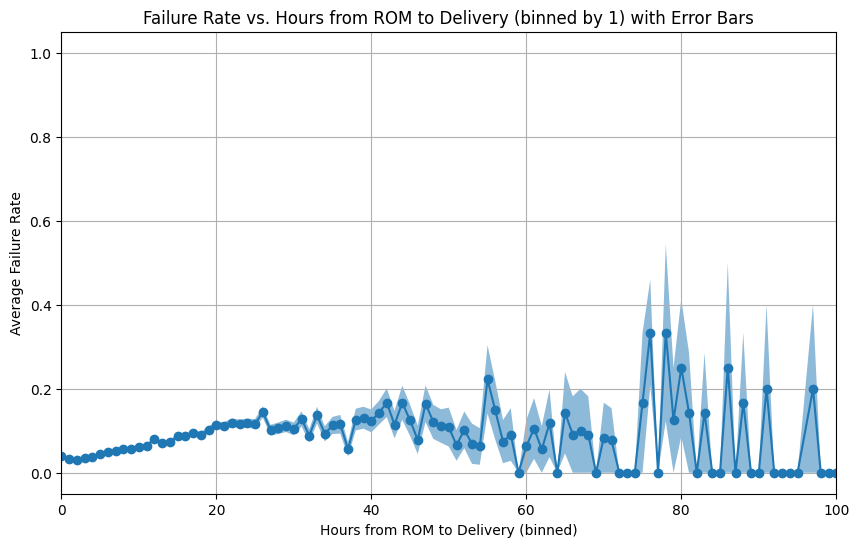

In [49]:
# prompt: do the same binned plot for rom_thru_delivery_hours

# Assuming 'neuraxial_catheter_df' is your DataFrame

df_plot = neuraxial_catheter_df.dropna(subset=['rom_thru_delivery_hours', 'failed_catheter'])

# Bin the rom_thru_delivery_hours
df_plot['rom_thru_delivery_hours_bin'] = (df_plot['rom_thru_delivery_hours'] // 1).astype(int)

# Group by the binned rom_thru_delivery_hours and calculate the mean and standard error of the mean of failed_catheter
failure_by_rom_delivery = df_plot.groupby('rom_thru_delivery_hours_bin')['failed_catheter'].agg(['mean', 'sem'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(failure_by_rom_delivery.index, failure_by_rom_delivery['mean'], marker='o')
plt.fill_between(failure_by_rom_delivery.index,
                 failure_by_rom_delivery['mean'] - failure_by_rom_delivery['sem'],
                 failure_by_rom_delivery['mean'] + failure_by_rom_delivery['sem'],
                 alpha=0.5)  # Add shaded error bars
plt.xlim(0,100)
plt.xlabel('Hours from ROM to Delivery (binned)')
plt.ylabel('Average Failure Rate')
plt.title('Failure Rate vs. Hours from ROM to Delivery (binned by 1) with Error Bars')
plt.grid(True)
plt.show()

# Statistical Analysis

In [50]:
import statsmodels.formula.api as smf

df_corr = neuraxial_catheter_df.dropna(subset=['lor_depth', 'number_of_neuraxial_attempts'])

# Fit the model using the formula
model = smf.ols('number_of_neuraxial_attempts ~ lor_depth', data=df_corr).fit()

# Print the summary of the regression results
print(model.summary())


KeyError: ['number_of_neuraxial_attempts']

In [ ]:
# For categorical variables like DPE and failed_catheter
from scipy.stats import chi2_contingency

dpe_crosstab = pd.crosstab(epidural_df['DPE'], epidural_df['failed_catheter'])
chi2, p, _, _ = chi2_contingency(dpe_crosstab)

print(dpe_crosstab.div(dpe_crosstab.sum(axis=1), axis=0) * 100)
print("Chi-squared statistic:", chi2)
print("P-value:", p)

In [ ]:
# prompt: Do univariate logistic regression separately using number of attempts and loss of resistance depth to predict failure

import statsmodels.api as sm
import statsmodels.formula.api as smf

# # Prepare the data for logistic regression with number of attempts as the predictor
# df_logreg_attempts = neuraxial_catheter_df.dropna(subset=['number_of_neuraxial_attempts', 'failed_catheter'])
# # Fit the logistic regression model
# model_attempts = smf.logit('failed_catheter ~ number_of_neuraxial_attempts', data=df_logreg_attempts).fit()

# # Print the summary of the model
# print(model_attempts.summary())


# Prepare the data for logistic regression with loss of resistance depth as the predictor
df_logreg_lor = neuraxial_catheter_df.dropna(subset=['lor_depth', 'failed_catheter'])
# Fit the logistic regression model
model_lor = smf.logit('failed_catheter ~ lor_depth', data=df_logreg_lor).fit()

# Print the summary of the model
print(model_lor.summary())


In [ ]:
# prompt: Now do multivariate analysis using the same two predictors

# Prepare the data for logistic regression with both predictors
df_logreg_multi = neuraxial_catheter_df.dropna(subset=['number_of_neuraxial_attempts', 'LOR_depth', 'failed_catheter'])

# Fit the logistic regression model with both predictors
model_multi = smf.logit('failed_catheter ~ number_of_neuraxial_attempts + LOR_depth', data=df_logreg_multi).fit()

# Print the summary of the model
print(model_multi.summary())


In [51]:

def all_regressions_each_dummy(df, outcome_col='failed_catheter'):
    """
    Fits a univariate logistic regression for each column in df (except outcome_col).
    For numeric columns, you get a single slope term.
    For categorical columns, you get one dummy variable per level (minus the reference).
    Then plots x=coefficient, y=-log10(p-value) for *all* those dummy variables.
    """
    
    # Make sure outcome is 0/1
    # df[outcome_col] = df[outcome_col].map({False:0, True:1})

    results = []

    for col in df.columns:
        # Skip the outcome column
        if col == outcome_col:
            continue
        
        # Skip datetime or other unsupported types
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            continue
        
        # Subset to non-null rows in outcome & predictor
        temp_df = df[[outcome_col, col]].dropna()
        
        # Skip if not enough variation
        if temp_df[col].nunique() < 2 or temp_df[col].count() < 5:
            continue
        
        # Build formula
        # Wrap in C() if categorical
        if pd.api.types.is_numeric_dtype(temp_df[col]):
            formula = f"{outcome_col} ~ {col}"
        else:
            formula = f"{outcome_col} ~ C({col})"
        
        # Fit the logistic model
        try:
            model = smf.logit(formula, data=temp_df).fit(disp=False)
        except Exception as e:
            print(f"Skipping column '{col}' due to fitting error: {e}")
            continue
        
        # For each parameter (except the Intercept),
        # capture the coefficient and p-value.
        for param_name in model.params.index:
            if param_name == 'Intercept':
                continue
            
            coef = model.params.loc[param_name]
            pval = model.pvalues.loc[param_name]
            
            # You might want to create a cleaner label for the parameter.
            # For categorical variables, param_name will look like 'C(col)[T.level]'
            # We'll store the raw param_name, but you can parse it if you like.
            results.append({
                'column': col,
                'param_name': param_name,  # e.g. C(col)[T.value]
                'coef': coef,
                'pval': pval
            })

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    if results_df.empty:
        print("No valid predictors found.")
        return pd.DataFrame()

    # Sort by p-value (optional)
    results_df = results_df.sort_values(by='pval')

    
    return results_df


# Example usage:
results_df = all_regressions_each_dummy(neuraxial_catheter_df, 'failed_catheter')
# This returns a DataFrame with columns: [column, param_name, coef, pval].
# Each level of a categorical predictor will appear as a separate row.

In [52]:
results_df

,column,param_name,coef,pval
3,delivery_site_2188,C(delivery_site_2188)[T.mgh],0.791655,1.959112e-141
22,bmi_end_pregnancy_2044,bmi_end_pregnancy_2044,0.036909,2.743103e-78
23,maternal_weight_end_pregnancy_2045,maternal_weight_end_pregnancy_2045,0.011328,4.235934e-60
20,fetal_presentation_position_2247,C(fetal_presentation_position_2247)[T.posterior],0.759106,4.347722e-52
30,lor_depth,lor_depth,0.143860,3.770944e-50
46,composite_psychosocial_problems,composite_psychosocial_problems,0.368071,6.225242e-42
10,rom_thru_delivery_hours,rom_thru_delivery_hours,0.005317,1.498792e-41
26,parity_2048,parity_2048,-0.279805,4.226334e-39
24,bmi_before_pregnancy_2161,bmi_before_pregnancy_2161,0.028879,5.253519e-37
21,fetal_presentation_position_2247,C(fetal_presentation_position_2247)[T.transverse],0.944076,4.439405e-31


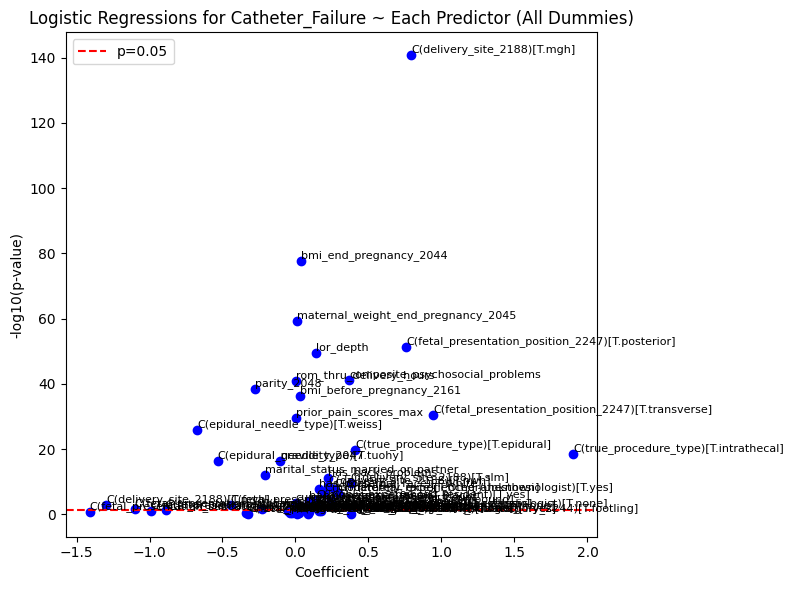

In [53]:

# Create plot: coefficient vs -log10(p-value)
fig, ax = plt.subplots(figsize=(8, 6))

offset = 1e-300  # so we don't take log10(0)
x_vals = results_df[results_df['pval'] < 0.9]['coef']
y_vals = -np.log10(results_df[results_df['pval'] < 0.9]['pval'] + offset)

sc = ax.scatter(x_vals, y_vals, color='blue')

# Annotate each point
for i, row in results_df[results_df['pval'] < 0.9].iterrows():
    ax.text(
        row['coef'],
        -np.log10(row['pval'] + offset),
        row['param_name'],  # or a cleaned-up version
        fontsize=8,
        ha='left',
        va='bottom'
    )

# Add a reference line for p=0.05
ax.axhline(-np.log10(0.05), color='red', linestyle='--', label='p=0.05')

ax.set_xlabel('Coefficient')
ax.set_ylabel('-log10(p-value)')
ax.set_title(f'Logistic Regressions for Catheter_Failure ~ Each Predictor (All Dummies)')
ax.legend()

plt.tight_layout()
plt.show()


# Logistic Regression Model

In [54]:
# Filter the DataFrame to include only neuraxial catheter (ie, epidural + CSE + intrathecal) or epidural-only catheter procedures
neuraxial_catheter_df = df[df['is_neuraxial_catheter'] == 1]

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

# Load the dataset
data = neuraxial_catheter_df

# Drop columns with more than 80% missing values
threshold = len(data) * 0.5
data_cleaned = data.dropna(thresh=threshold, axis=1)

# Drop rows where target variable is missing
data_cleaned = data_cleaned.dropna(subset=["failed_catheter"])

# Separate features and target variable
X = data_cleaned.drop(columns=["failed_catheter", "best_timestamp"], errors='ignore')
y = data_cleaned["failed_catheter"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns.tolist()

# Create preprocessing pipelines
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                           ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing into a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Train logistic regression with class weights
logistic_model = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced', n_jobs=1)
logistic_model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_preprocessed)
y_pred_prob = logistic_model.predict_proba(X_test_preprocessed)[:, 1]

# Evaluate the model
evaluation_metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_pred_prob),
    "classification_report": classification_report(y_test, y_pred)
}

# Print evaluation metrics
print("Model Evaluation:")
for metric, value in evaluation_metrics.items():
    if metric == "classification_report":
        print("\nClassification Report:\n", value)
    else:
        print(f"{metric.capitalize()}: {value:.4f}")


Model Evaluation:
Accuracy: 0.6515
Precision: 0.0962
Recall: 0.5906
Roc_auc: 0.6717

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.66      0.78     20247
           1       0.10      0.59      0.17      1258

    accuracy                           0.65     21505
   macro avg       0.53      0.62      0.47     21505
weighted avg       0.91      0.65      0.74     21505



# Next Steps

XGBoost - hyperparameter tuning with Optuna

Shapley values for interpretability

To prevent data leakage, could split by Encounter

Be meticulous with labels

Eliminate features that are both poorly predictive and have lots of missing data

Abstract functions and separate them into different files

Fewer features will improve interpretability